In [1]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import re
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Codes

In [3]:
#textprops documentation
#https://matplotlib.org/stable/tutorials/text/text_props.html

#documentation
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html

#changes font color in markdown
### <font color='royalblue'> Visual (Question 2) </font>

#can see all rows and columns of dataframe
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

#HTML codes for colors
#https://www.htmlcsscolor.com/hex/64924F

# Read in Data

In [4]:
movie = pd.read_csv("../Data/IMDb_Movies.csv")

In [5]:
score = pd.read_csv("../Data/IMDb_Score.csv")

In [6]:
rt = pd.read_csv("../Data/Rotten_Tomatoes.csv")

In [7]:
genre = pd.read_csv("../Data/Genre.csv")

In [8]:
dist = pd.read_csv("../Data/Distributor.csv")

### Movie and RT combined

In [9]:
m_rt = movie.merge(rt, how = 'outer', on = 'Title_ID')
m_rt.head()

,Title_ID,Title,Director,Rating,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,Tomatometer,RT_Audience_Score,RT_Critic_Reviews,RT_Audience_Reviews,US_Box_Office,Original_Language,RT_All_Pct,US_Box_Int
0,17761,The Shawshank Redemption,Frank Darabont,R,142,1994,43,21,7041,91,98,82,250k+,27.3 M,English,94.5,2730000.0
1,17762,The Godfather,Francis Ford Coppola,R,175,1972,30,32,7042,97,98,149,250k+,134.8 M,English,97.5,13480000.0
2,17763,The Dark Knight,Christopher Nolan,PG-13,152,2008,163,160,7043,94,94,345,250k+,2.0 M,English,94.0,200000.0
3,17764,The Godfather Part II,Francis Ford Coppola,R,202,1974,21,17,7044,96,97,123,250k+,0,English,96.5,0.0
4,17765,12 Angry Men,Sidney Lumet,Approved,96,1957,13,17,7045,100,97,58,100k+,0,English,98.5,0.0


### Movie and Score Combined

In [10]:
m_s = movie.merge(score, how = 'outer', on = 'Score_ID')
m_s.head()

,Title_ID,Title,Director,Rating,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,IMDb_Score,Audience_Reviews,US_Users,Non_US_Users,Male_Reviews,Female_Reviews,Male_Score,Female_Score,IMDb_Score_Pct
0,17761,The Shawshank Redemption,Frank Darabont,R,142,1994,43,21,7041,9.3,2666904,566032,1672983,1475251,294889,9.3,9.2,93
1,17762,The Godfather,Francis Ford Coppola,R,175,1972,30,32,7042,9.2,1848055,417566,1161734,1072921,166441,9.2,8.9,92
2,17763,The Dark Knight,Christopher Nolan,PG-13,152,2008,163,160,7043,9.0,2639814,621027,1646769,1490958,267216,9.0,8.7,90
3,17764,The Godfather Part II,Francis Ford Coppola,R,202,1974,21,17,7044,9.0,1265636,282291,805848,759883,105690,9.0,8.7,90
4,17765,12 Angry Men,Sidney Lumet,Approved,96,1957,13,17,7045,9.0,787589,187528,509017,453568,76860,9.0,8.9,90


### Movie, Score, and RT in One DataFrame

In [11]:
all_df = m_rt.merge(score, how = "left", on = "Score_ID")
all_df.head()

,Title_ID,Title,Director,Rating,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,Tomatometer,...,US_Box_Int,IMDb_Score,Audience_Reviews,US_Users,Non_US_Users,Male_Reviews,Female_Reviews,Male_Score,Female_Score,IMDb_Score_Pct
0,17761,The Shawshank Redemption,Frank Darabont,R,142,1994,43,21,7041,91,...,2730000.0,9.3,2666904,566032,1672983,1475251,294889,9.3,9.2,93
1,17762,The Godfather,Francis Ford Coppola,R,175,1972,30,32,7042,97,...,13480000.0,9.2,1848055,417566,1161734,1072921,166441,9.2,8.9,92
2,17763,The Dark Knight,Christopher Nolan,PG-13,152,2008,163,160,7043,94,...,200000.0,9.0,2639814,621027,1646769,1490958,267216,9.0,8.7,90
3,17764,The Godfather Part II,Francis Ford Coppola,R,202,1974,21,17,7044,96,...,0.0,9.0,1265636,282291,805848,759883,105690,9.0,8.7,90
4,17765,12 Angry Men,Sidney Lumet,Approved,96,1957,13,17,7045,100,...,0.0,9.0,787589,187528,509017,453568,76860,9.0,8.9,90


### Movie and Genre 

In [12]:
m_g = movie.merge(genre, how = 'inner', on = 'Title_ID')
m_g

,Title_ID,Title,Director,Rating,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,Genre
0,17761,The Shawshank Redemption,Frank Darabont,R,142,1994,43,21,7041,Drama
1,17762,The Godfather,Francis Ford Coppola,R,175,1972,30,32,7042,Crime
2,17762,The Godfather,Francis Ford Coppola,R,175,1972,30,32,7042,Drama
3,17763,The Dark Knight,Christopher Nolan,PG-13,152,2008,163,160,7043,Action
4,17763,The Dark Knight,Christopher Nolan,PG-13,152,2008,163,160,7043,Crime
...,...,...,...,...,...,...,...,...,...,...
620,1776249,The Iron Giant,Brad Bird,PG,86,1999,18,20,704249,Action
621,1776249,The Iron Giant,Brad Bird,PG,86,1999,18,20,704249,Adventure
622,1776250,Gandhi,Richard Attenborough,PG,191,1982,21,35,704250,Biography
623,1776250,Gandhi,Richard Attenborough,PG,191,1982,21,35,704250,Drama


### Movie and Distributor

In [13]:
m_d = movie.merge(dist, how = 'inner', on = 'Title_ID')
m_d

,Title_ID,Title,Director,Rating,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,Distributor
0,17761,The Shawshank Redemption,Frank Darabont,R,142,1994,43,21,7041,Columbia Pictures
1,17762,The Godfather,Francis Ford Coppola,R,175,1972,30,32,7042,Paramount Pictures
2,17763,The Dark Knight,Christopher Nolan,PG-13,152,2008,163,160,7043,Warner Bros.
3,17764,The Godfather Part II,Francis Ford Coppola,R,202,1974,21,17,7044,Paramount Pictures
4,17765,12 Angry Men,Sidney Lumet,Approved,96,1957,13,17,7045,Criterion Collection
...,...,...,...,...,...,...,...,...,...,...
352,1776246,Dersu Uzala,Akira Kurosawa,G,142,1975,2,8,704246,New World Pictures
353,1776247,Aladdin,Ron Clements,G,90,1992,22,34,704247,Walt Disney
354,1776248,The Help,Tate Taylor,PG-13,146,2011,121,79,704248,Walt Disney
355,1776249,The Iron Giant,Brad Bird,PG,86,1999,18,20,704249,Warner Bros. Pictures


In [128]:
all_df['Original_Language'] = all_df['Original_Language'].replace('French (Canada)', 'French')
all_df['Original_Language'] = all_df['Original_Language'].replace('French (France)', 'French')
all_df['Original_Language'] = all_df['Original_Language'].replace('Spanish (Spain)', 'Spanish')
all_df['Original_Language'] = all_df['Original_Language'].replace('English (United Kingdom)', 'English')

# How do the Top 250 Movies by IMDb compare to Rotten Tomatoes?

## Question 1: What is the average rating by genre for both IMDb and Rotten Tomatoes?

In [14]:
all_g = all_df.merge(genre, how = 'inner', on = 'Title_ID')
counts = list(all_g.Genre.value_counts())
counts

[176, 60, 51, 51, 46, 31, 30, 29, 23, 23, 23, 20, 14, 13, 10, 6, 5, 5, 4, 4, 1]

In [110]:
#creating my sub table
avg_rate = all_g.groupby('Genre')['RT_Audience_Score','IMDb_Score_Pct'].mean()
avg_rate.reset_index(inplace=True)

#rounding percents
avg_rate['Avg_RT_Pct'] = round(avg_rate['RT_Audience_Score'],1)
avg_rate['Avg_IMDb_Pct'] = round(avg_rate['IMDb_Score_Pct'],1)
avg_rate['Count'] = counts

#getting rid of the now unnecessary columns
avg_rate.pop('RT_Audience_Score')
avg_rate.pop('IMDb_Score_Pct')

#creating threshold of 25 or more
av = avg_rate[~(avg_rate['Count'] <= 25)]
av

C:\Users\hanna\AppData\Local\Temp\ipykernel_3352\3287642944.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_rate = all_g.groupby('Genre')['RT_Audience_Score','IMDb_Score_Pct'].mean()


,Genre,Avg_RT_Pct,Avg_IMDb_Pct,Count
0,Action,92.0,83.5,176
1,Adventure,91.5,83.0,60
2,Animation,91.3,82.5,51
3,Biography,91.9,82.5,51
4,Comedy,91.2,82.3,46
5,Crime,91.3,83.6,31
6,Drama,91.4,83.2,30
7,Family,89.0,82.6,29


Text(0.5, 1.01, 'Threshold: 25 Films')

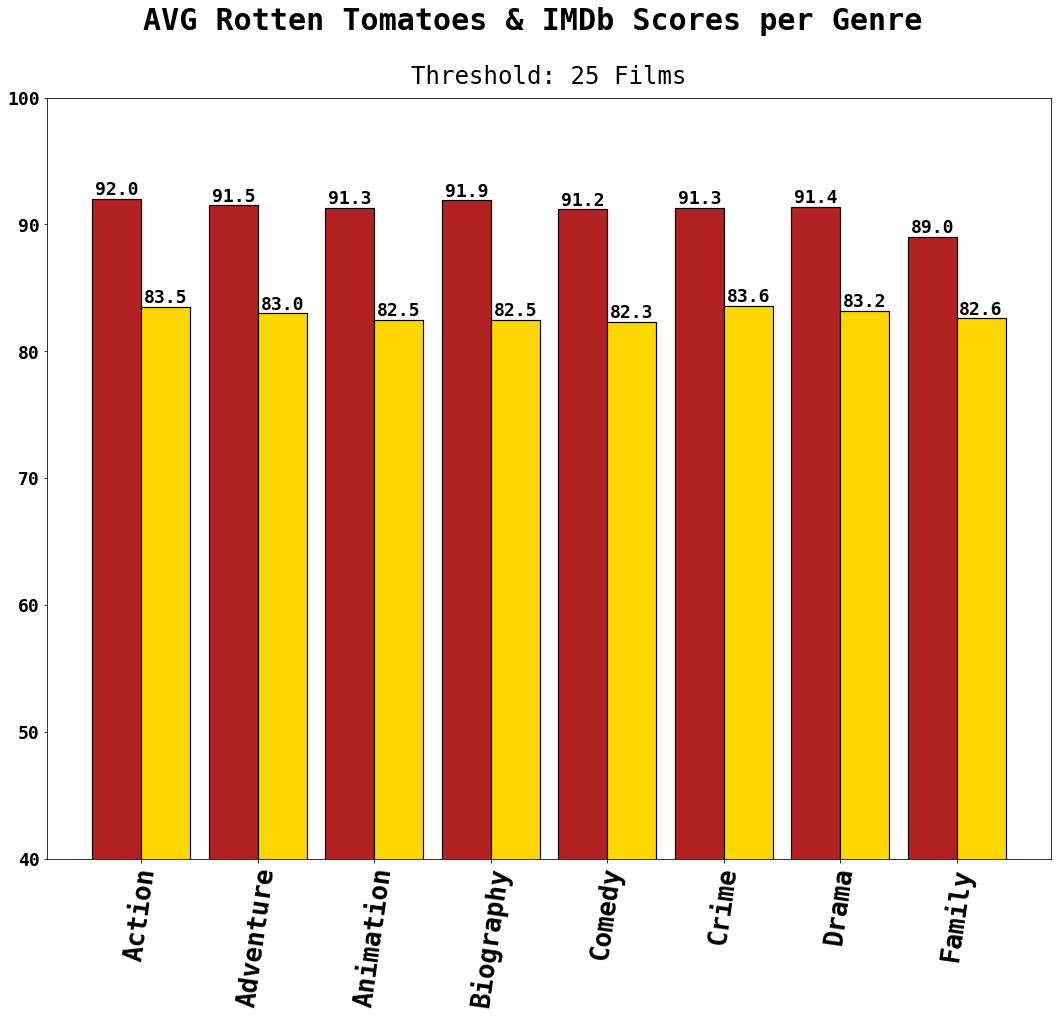

In [124]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Create the y value and bar width 
x = np.arange(len(av['Genre']))
width = 0.42

# Define plot size
plt.rcParams['figure.figsize'] = [18, 14]

# Plot the x and y values
fig,ax = plt.subplots()
bar1 = ax.bar(x-width/2, av['Avg_RT_Pct'], width, color = 'firebrick', edgecolor = 'black', linewidth = 1.2)
bar2 = ax.bar(x+width/2, av['Avg_IMDb_Pct'], width, color = 'gold', edgecolor = 'black', linewidth = 1.2)
 
# label values for bars
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html
for bar in ax.patches:
    bar_value = bar.get_height() # The text annotation for each bar should be its height.
    text = f'{bar_value:,}'   # Format the text with commas to separate thousands. 
    text_x = bar.get_x() + bar.get_width() / 2 # This will give the middle of each bar on the x-axis.
    # get_y() is where the bar starts so we add the height to it.
    text_y = bar.get_y() + bar_value
    # If we want the text to be the same color as the bar, we can get the color like so:
    bar_color = bar.get_facecolor()
    # If you want a consistent color, you can just set it as a constant, e.g. #222222
    ax.text(text_x, text_y, text, ha='center', va='bottom', 
            color='black',size=18,weight='semibold')
    
# Set the x labels and legends
ax.set_xticks(x)
ax.set_xticklabels(av['Genre'], weight = 'semibold', size = '26', rotation = 82)
ax.legend

# Set the y labels
ax.set_ylim(40,100)
ax.set_yticks([40,50,60,70,80,90,100])
ax.set_yticklabels(['40','50','60','70','80','90','100'], weight = 'bold', size = '18')

#title 
plt.suptitle("AVG Rotten Tomatoes & IMDb Scores per Genre", 
             weight = 'bold', size = 30, x =.5, y=.97)
plt.title("Threshold: 25 Films", weight = 'medium', size = 24,x =.5, y=1.01)
#Clustered Bar legend
# plt.legend(["Rotten Tomatoes", "IMDb"], ncol=1, loc="upper left", bbox_to_anchor= (.774,1.008), fontsize = '17');

In [111]:
av['Diff']=av['Avg_RT_Pct'] - av['Avg_IMDb_Pct']
av

C:\Users\hanna\AppData\Local\Temp\ipykernel_3352\3195148242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  av['Diff']=av['Avg_RT_Pct'] - av['Avg_IMDb_Pct']


,Genre,Avg_RT_Pct,Avg_IMDb_Pct,Count,Diff
0,Action,92.0,83.5,176,8.5
1,Adventure,91.5,83.0,60,8.5
2,Animation,91.3,82.5,51,8.8
3,Biography,91.9,82.5,51,9.4
4,Comedy,91.2,82.3,46,8.9
5,Crime,91.3,83.6,31,7.7
6,Drama,91.4,83.2,30,8.2
7,Family,89.0,82.6,29,6.4


## Question 2: Which movies won the most awards?

In [18]:
m = all_df.nlargest(62,'Award_Wins')

## Runtime Pie Chart

In [19]:
rlist = list(m['Runtime'].value_counts())

In [20]:
rpd = pd.DataFrame(m['Runtime'].value_counts())
rpd.reset_index(inplace=True)
rpd = rpd.rename(columns = {'index':'Runtime','Runtime':'Count'})

def time_block(x):
    if x >= 180:
        return 'More than 3 hrs'
    elif x >= 120:
        return 'More than 2 hrs'
    elif x >= 60:
        return 'More than 1 hr'
    else:
        return 'Less than 1 hr'

rpd['Time_Block'] = rpd['Runtime'].map(time_block)

In [21]:
rgroup = pd.DataFrame(rpd.groupby('Time_Block')['Count'].sum())
rgroup.reset_index(inplace=True)
sorttime = rgroup.sort_values('Count',ascending = False)
sorttime

,Time_Block,Count
1,More than 2 hrs,39
0,More than 1 hr,20
2,More than 3 hrs,3


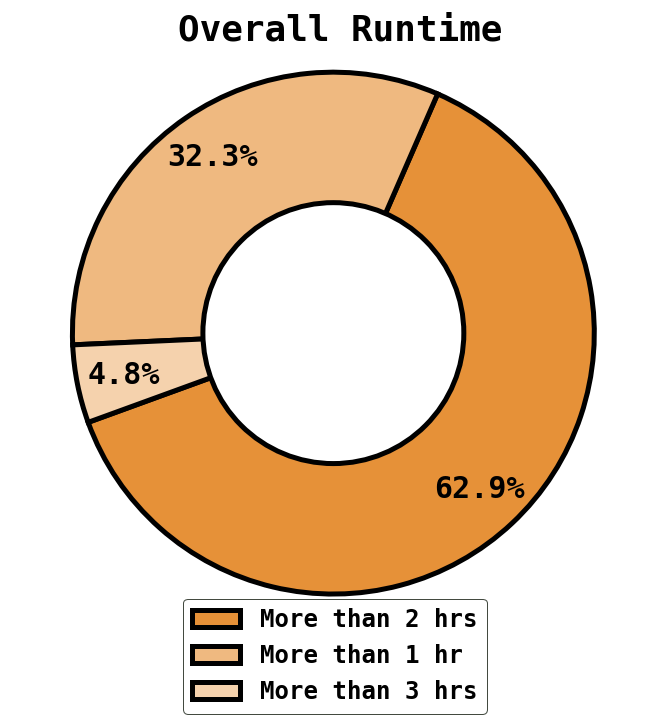

In [324]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Define plot size
plt.rcParams['figure.figsize'] = [18, 12]

#bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#bbox_props =dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1')

#pie chart
sorttime.plot(x='Time_Block', y='Count', kind = 'pie', 
              colors = ['#e69138','#efb980','#f5d2ad'],startangle = 200,
              labels = ('','',''),
              autopct='%1.1f%%', pctdistance = .82, 
              textprops = {'color':'black'}, fontsize = 30,
              wedgeprops = {"edgecolor" : "black",'linewidth': 5,'clip_on': True})

# draw circle
centre_circle = plt.Circle((0, 0), 0.5, fc='white',edgecolor = 'black', linewidth = 5)
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

#legend
labels = sorttime['Time_Block']
plt.legend(labels, bbox_to_anchor=(.64,.048), edgecolor='#151E11',
           loc = 'lower right', fontsize=24, bbox_transform=plt.gcf().transFigure)

#removing y label
plt.ylabel('')

#title
plt.title("Overall Runtime", weight = 'bold', size = 36, x = .51, y = .94);

# plt.pie(hours,labels=activities, autopct=lambda p: format(p, 
#         '.2f') if p > 15 else None)

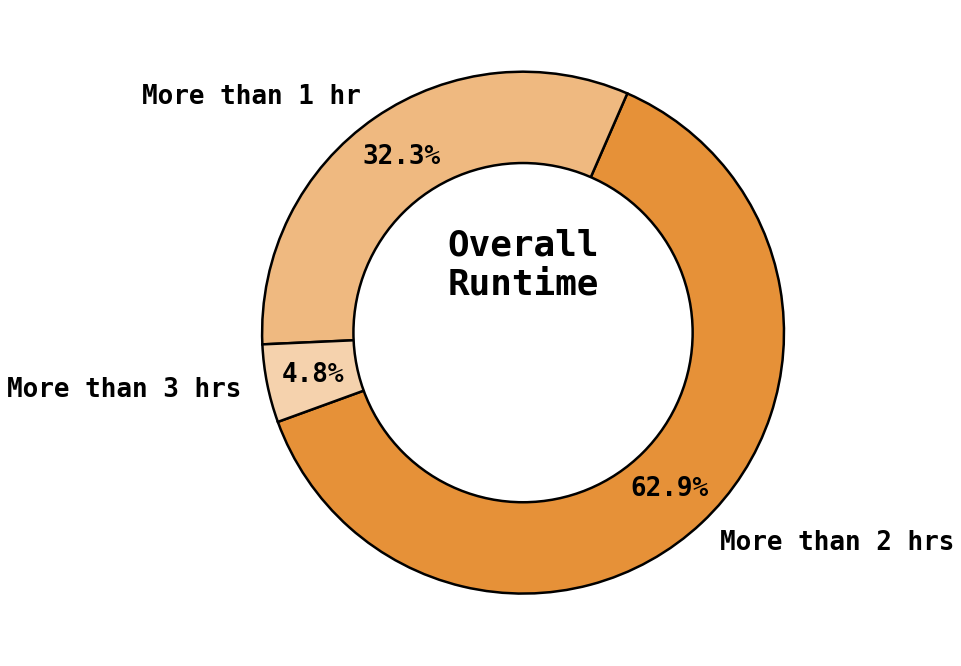

In [305]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Define plot size
plt.rcParams['figure.figsize'] = [18, 12]

#bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#bbox_props =dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1')

#pie chart
sorttime.plot(x='Time_Block', y='Count', kind = 'pie', 
              colors = ['#e69138','#efb980','#f5d2ad'],startangle = 200,
              labels = sorttime['Time_Block'], legend = False,
              autopct='%1.1f%%', pctdistance = .82, 
              textprops = {'color':'black'}, fontsize = 26,
              wedgeprops = {"edgecolor" : "black",'linewidth': 2.5,'clip_on': True})

# draw circle
centre_circle = plt.Circle((0, 0), 0.65, fc='white',edgecolor = 'black', linewidth = 2.5)
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

#legend
# labels = sorttime['Time_Block']
# plt.legend(labels, bbox_to_anchor=(.618,.39), edgecolor='#151E11',
#            loc = 'lower right', fontsize=20, bbox_transform=plt.gcf().transFigure)

#removing y label
plt.ylabel('')

#title
plt.title("Overall\n" + "Runtime", weight = 'bold', size = 36, x = .5, y = .55);

## Genre Bar Chart

In [23]:
m_genre = m.merge(genre, how = 'inner', on = 'Title_ID')
m_dist = m.merge(dist, how = 'inner', on = 'Title_ID')
glst = pd.DataFrame(m_genre['Genre'].value_counts())
glst.reset_index(inplace=True)
glst = glst.rename(columns = {'index':'Genre','Genre':'Count'})

In [24]:
glst10 = pd.DataFrame(glst.nlargest(10,'Count'))
glst10

,Genre,Count
0,Drama,44
1,Adventure,21
2,Action,13
3,Comedy,13
4,Thriller,13
5,Crime,12
6,Animation,10
7,Romance,6
8,Biography,6
9,Mystery,5


C:\Users\hanna\AppData\Local\Temp\ipykernel_3352\1364687732.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,10,20,30,40,50])


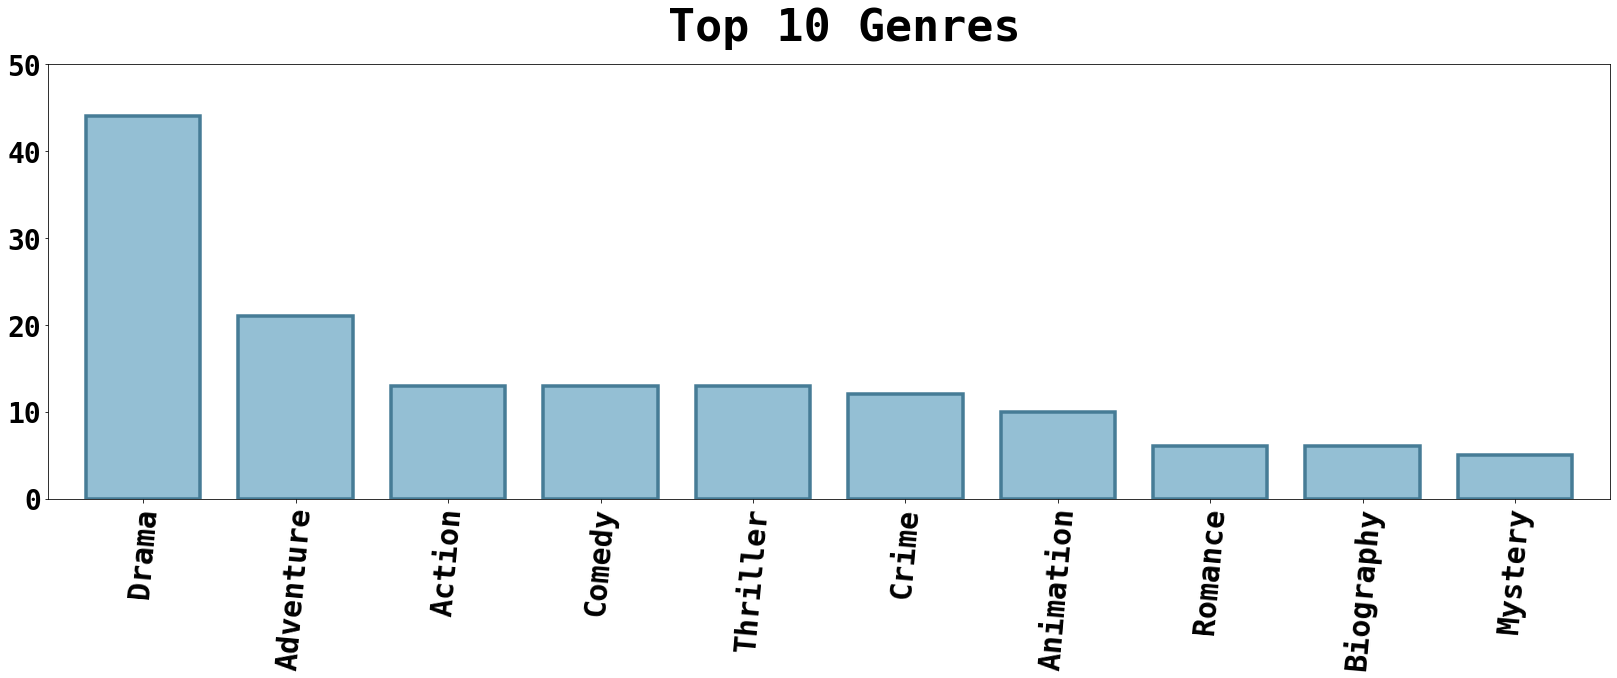

In [204]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Define plot size
plt.rcParams['figure.figsize'] = [28, 8]

#bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#bar chart
ax = glst10.plot(x='Genre', y='Count', kind = 'bar', color = '#94BFD4',
                 edgecolor = '#467C96', linewidth = 3.5, 
                 legend = False, fontsize = 28, width = .75)

#removing x label and adding y label
plt.xlabel('')
plt.ylabel('')

# Set the y labels
ax.set_ylim(0, 50)
ax.set_yticklabels([0,10,20,30,40,50])

# Set the x labels and legends
ax.set_xticklabels(glst10['Genre'], weight = 'semibold', size = '30', rotation = 85)
ax.legend

#title
plt.title("Top 10 Genres", weight = 'bold', size = 45, x =.51, y=1.04);

## Release Year Waffle Chart

In [26]:
from pywaffle import Waffle

In [27]:
# # To plot the waffle Chart
# fig = plt.figure(
#     FigureClass = Waffle,
#     rows = 5,
#     values = dirt.Count,
#     labels = list(dirt.Director))

## Director Bar Chart

In [28]:
direct = pd.DataFrame(m['Director'].value_counts()).reset_index()
direct = direct.rename(columns = {'index':'Director', 'Director':'Count'})
direct

,Director,Count
0,Quentin Tarantino,3
1,Peter Jackson,3
2,Christopher Nolan,3
3,Brad Bird,2
4,Andrew Stanton,2
5,Lee Unkrich,2
6,Steven Spielberg,2
7,Clint Eastwood,2
8,Pete Docter,2
9,Sam Mendes,2


In [29]:
direct_group = pd.DataFrame(direct.groupby(['Count'])['Count'].count())
direct_group = direct_group.rename(columns = {'Count':'Total_Directors'})
direct_group = direct_group.reset_index().rename(columns = {'Count':'Movie_Count'})
direct_group

,Movie_Count,Total_Directors
0,1,37
1,2,8
2,3,3


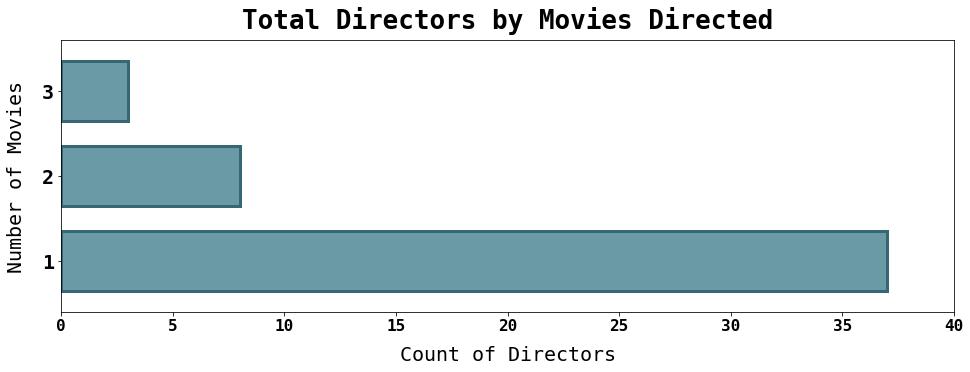

In [205]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Define plot size
plt.rcParams['figure.figsize'] = [16, 5]

#bold
plt.rcParams["axes.labelweight"] = "bold"

#bar chart
ax = direct_group.plot(x='Movie_Count', y='Total_Directors', kind = 'barh', width = .7,
    color = '#6A9AA5',edgecolor = '#376772', linewidth = 3, legend = False, fontsize = 16)

#removing x label and adding y label
plt.xlabel('Count of Directors', weight = 'medium', size = '20', labelpad = 12)
plt.ylabel('Number of Movies', weight = 'medium', size = '20', labelpad = 16)

# Set the x labels
ax.set_xlim(0, 40)
ax.set_xticks([0,5,10,15,20,25,30,35,40])

#y tick labels
ax.set_yticklabels([1,2,3],size = 20)

# #bar label
# plt.bar_label(ax.containers[0], size = '28',color = 'white', padding=-42)

#title
plt.title("Total Directors by Movies Directed", weight = 'bold', size = 26, y=1.02);

## Did they receive a high rating on IMDb? What about Rotten Tomatoes?

In [113]:
movie_award = all_df[['Title','RT_Audience_Score','IMDb_Score_Pct','Award_Noms', 'Award_Wins']].nlargest(10, 'Award_Wins')
movie_award

,Title,RT_Audience_Score,IMDb_Score_Pct,Award_Noms,Award_Wins
33,Parasite,90,85,271,308
199,Mad Max: Fury Road,86,81,234,247
179,12 Years a Slave,90,81,337,242
6,The Lord of the Rings: The Return of the King,86,90,124,209
151,No Country for Old Men,86,82,140,164
2,The Dark Knight,94,90,163,160
13,Inception,91,88,220,158
186,The Grand Budapest Hotel,86,81,227,136
122,1917,88,82,206,135
72,Inglourious Basterds,88,83,172,134


ANSWER: <br>
1. Parasite <br>
2. Mad Max: Fury Road <br>
3. 12 Years a Slave <br>
4. LOTR: The Return of the King <br>
5. No Country for Old Men <br>
6. The Dark Knight <br>
7. Inception <br>
8. The Grand Budapest Hotel <br>
9. 1917 <br>
10. Inglourious Basterds <br>

IMDb: LOTR, Dark Knight, and Inception rated higher on IMDb over the Parasite <br>
RT_Aud: 12 Years a Slave received the same rating as Parasite, but Dark Knight and Inception have a higher rating <br>
RT_Crit: Parasite was the fan favorite of critics

In [116]:
movie_award['Title'] = movie_award['Title'].replace('The Lord of the Rings: The Return of the King', 'LOTR: Return of the King')

### <font color='royalblue'> Visual (Question 2) </font>

Text(0.51, 1.03, 'Top 10 Award Winning Movies')

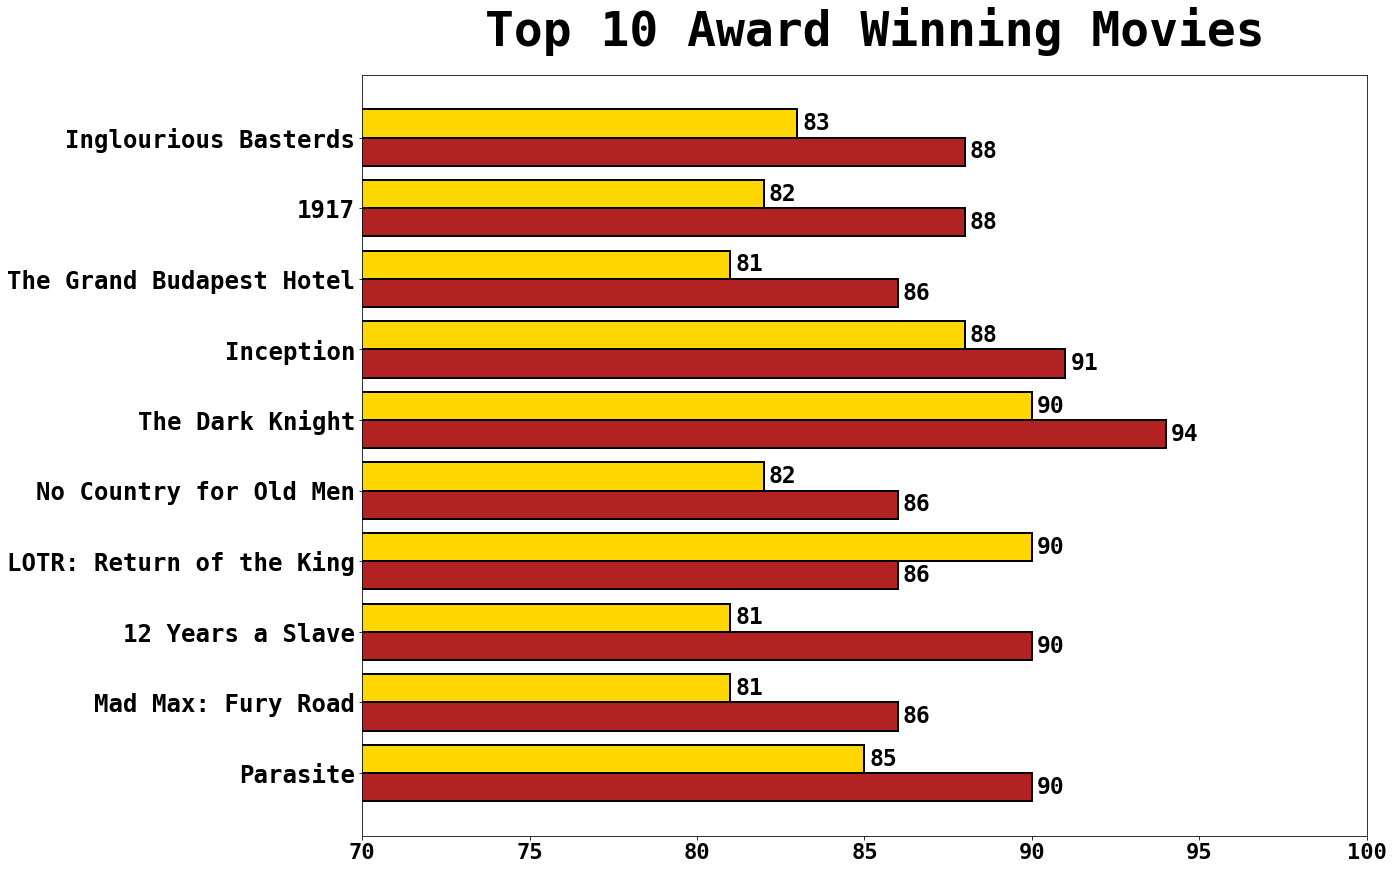

In [117]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Create the y value and bar width 
y = np.arange(len(movie_award['Title']))
width = 0.4

# Define plot size
plt.rcParams['figure.figsize'] = [18, 14]

# Plot the x and y values
fig,ax = plt.subplots()
bar1 = ax.barh(y-width/2, movie_award['RT_Audience_Score'], 
               width, color = 'firebrick', edgecolor = 'black', linewidth = 2)
bar2 = ax.barh(y+width/2, movie_award['IMDb_Score_Pct'], 
               width, color = 'gold', edgecolor = 'black', linewidth = 2)
 
# Set the y labels and legends
ax.set_yticks(y)
ax.set_yticklabels(movie_award['Title'], weight = 'semibold', size = '24')
ax.legend

#bar label
ax.bar_label(bar1, padding=5, size = '23')
ax.bar_label(bar2, padding=5, size ='23')
    
# Set the x labels
ax.set_xlim(70, 100)
ax.set_xticks([70,75,80,85,90,95,100])
ax.set_xticklabels(['70','75','80','85','90','95','100'], weight = 'bold', size = '22')

#title 
ax.set_title('Top 10 Award Winning Movies', weight = 'bold', 
             size = '48', x =.51, y=1.03)

#Clustered Bar legend
# plt.legend(["Rotten Tomatoes", "IMDb"], ncol=1, loc="upper left", 
#            bbox_to_anchor= (.668,1.01), fontsize = '25');

In [115]:
movie_award['Diff'] = movie_award['RT_Audience_Score'] - movie_award['IMDb_Score_Pct']
movie_award

,Title,RT_Audience_Score,IMDb_Score_Pct,Award_Noms,Award_Wins,Diff
33,Parasite,90,85,271,308,5
199,Mad Max: Fury Road,86,81,234,247,5
179,12 Years a Slave,90,81,337,242,9
6,The Lord of the Rings: The Return of the King,86,90,124,209,-4
151,No Country for Old Men,86,82,140,164,4
2,The Dark Knight,94,90,163,160,4
13,Inception,91,88,220,158,3
186,The Grand Budapest Hotel,86,81,227,136,5
122,1917,88,82,206,135,6
72,Inglourious Basterds,88,83,172,134,5


## Question 3: For non-English movies, which group, US or non-US Users, tended to leave more reviews?

#### How many of the movies' original language was not English?

In [35]:
not_eng = all_df.loc[(all_df['Original_Language'] != 'English') 
                     & (all_df['Original_Language'] != "English (United Kingdom)")
                     & (all_df['Original_Language'] != "Not Available")]

#combining the same languages
not_eng['Original_Language'] = not_eng['Original_Language'].replace('French (Canada)', 'French').replace('French (France)', 'French')
not_eng['Original_Language'] = not_eng['Original_Language'].replace('Spanish (Spain)', 'Spanish').replace('Portuguese (Brazil)','Portuguese')

C:\Users\hanna\AppData\Local\Temp\ipykernel_3352\219897345.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_eng['Original_Language'] = not_eng['Original_Language'].replace('French (Canada)', 'French').replace('French (France)', 'French')
C:\Users\hanna\AppData\Local\Temp\ipykernel_3352\219897345.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_eng['Original_Language'] = not_eng['Original_Language'].replace('Spanish (Spain)', 'Spanish').replace('Portuguese (Brazil)','Portuguese')


In [36]:
lang_count = pd.DataFrame(not_eng['Original_Language'].value_counts())
lang_count.reset_index(inplace=True)
language = lang_count.rename(columns = {'index':'Original Language','Original_Language':'Total Movies'})

#print
language

,Original Language,Total Movies
0,Japanese,14
1,French,6
2,Italian,5
3,German,5
4,Korean,4
5,Hindi,3
6,Spanish,3
7,Swedish,3
8,Arabic,2
9,Persian,2


### <font color='royalblue'> Visual (Question 3.a) </font>

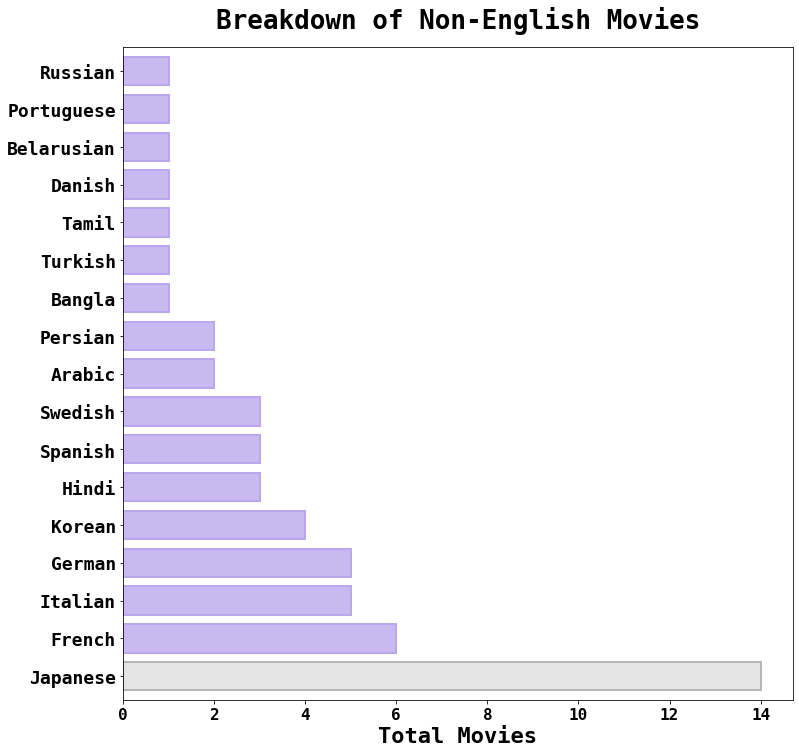

In [37]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Define plot size
plt.rcParams['figure.figsize'] = [12, 12]

#bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#bar chart
ax = language.plot(x='Original Language', y='Total Movies', kind = 'barh', 
    color = ['#E4E4E4','#C9B9F1','#C9B9F1','#C9B9F1','#C9B9F1','#C9B9F1',
             '#C9B9F1','#C9B9F1','#C9B9F1','#C9B9F1','#C9B9F1','#C9B9F1',
             '#C9B9F1','#C9B9F1','#C9B9F1','#C9B9F1','#C9B9F1','#C9B9F1','#C9B9F1'],
    edgecolor = ['#B6B6B6','#BBA7EE','#BBA7EE','#BBA7EE','#BBA7EE','#BBA7EE',
                 '#BBA7EE','#BBA7EE','#BBA7EE','#BBA7EE','#BBA7EE','#BBA7EE',
                 '#BBA7EE','#BBA7EE','#BBA7EE','#BBA7EE','#BBA7EE','#BBA7EE','#BBA7EE'],
    linewidth = 2, legend = False, fontsize = 16, width = .75)

#removing x label and adding y label
plt.ylabel('')
plt.xlabel('Total Movies', weight = 'semibold', size = '22')

# Set the x labels
ax.set_yticklabels(language['Original Language'], weight = 'semibold', size = '18')

#title
plt.title("Breakdown of Non-English Movies", weight = 'bold', size = 26, y=1.02);

## AVG Runtimes for Top 3

In [107]:
all_df = m_rt.merge(score, how = "left", on = "Score_ID")
lang_run = all_df[['Original_Language','Runtime']]

all_df['Original_Language'] = all_df['Original_Language'].replace('French (Canada)', 'French').replace('French (France)', 'French').replace('English (United Kingdom)','English')
all_df['Original_Language'] = all_df['Original_Language'].replace('Spanish (Spain)', 'Spanish').replace('Portuguese (Brazil)','Portuguese')

all = all_df.loc[(all_df['Original_Language'] != "Not Available")]
all_group = pd.DataFrame(all['Original_Language'].value_counts()).reset_index()
all_m = all_group.merge(lang_run, how = 'inner', left_on = 'index', right_on = 'Original_Language')
group_all = pd.DataFrame(all_m.groupby(['Original_Language_y','Original_Language_x'])['Runtime'].mean()).reset_index()
group_all['Runtime'] = group_all['Runtime'].astype(int)
sort = group_all.sort_values(by='Original_Language_x', ascending = False)[:8]
sort1 = sort.sort_values(by='Runtime', ascending = False)[:3]
sort1

,Original_Language_y,Original_Language_x,Runtime
6,Hindi,3,165
5,German,5,138
12,Spanish,3,138


In [74]:
# avg_time = pd.DataFrame(all.groupby(['Original_Language'])['Runtime'].mean()).reset_index()
# avg_runtime = avg_time.merge(language,how='left',left_on='Original_Language', right_on ='Original Language')
# avg_runtime_top3 = avg_runtime.loc[avg_runtime['Total Movies']>=3].sort_values('Runtime', ascending=False)[0:3]
# avg_runtime_top3['Runtime'] = avg_runtime_top3['Runtime'].astype(int)
# avg_runtime_top3

,Original_Language,Runtime,Original Language,Total Movies


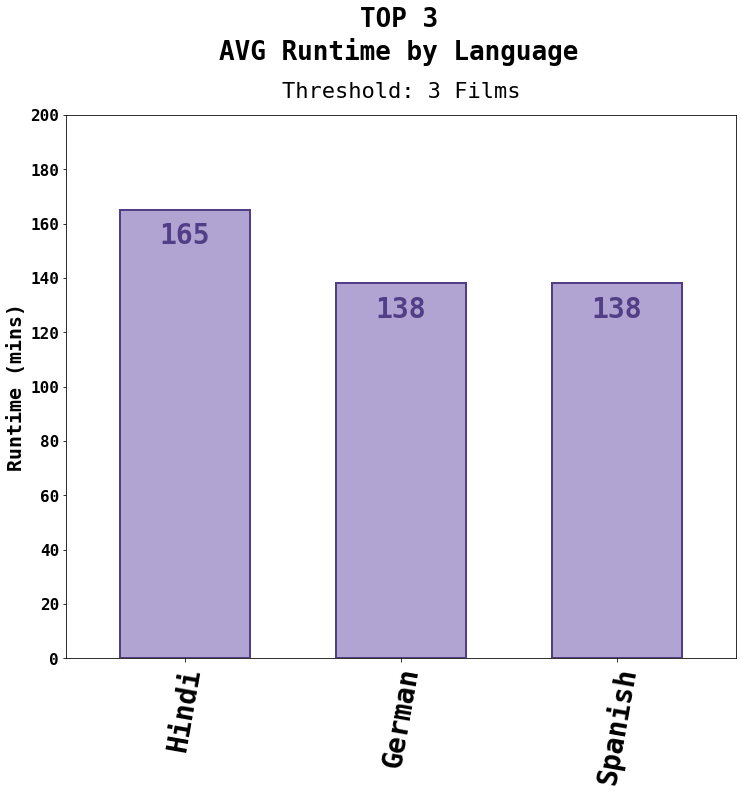

In [108]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Define plot size
plt.rcParams['figure.figsize'] = [12, 10]

#bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#bar chart
ax = sort1.plot(x='Original_Language_y', y='Runtime', kind = 'bar', width = .6,
    color = '#B1A4D2',edgecolor = '#523E86',linewidth = 2, legend = False, fontsize = 16)

#removing x label and adding y label
plt.xlabel('')
plt.ylabel('Runtime (mins)', weight = 'semibold', size = '20')

# Set the y labels
ax.set_ylim(0, 200)
ax.set_yticks([0,20,40,60,80,100,120,140,160,180,200], weight = 'bold', size = '20')

# Set the x labels
ax.set_xticklabels(sort1['Original_Language_y'], weight = 'semibold', size = '28', rotation = 80)

#bar label
plt.bar_label(ax.containers[0], size = '28',color = '#523E86', padding=-40)

#title
plt.suptitle("TOP 3\n" + "AVG Runtime by Language", weight = 'bold', size = 26, x = .51, y=1.03)
plt.title("Threshold: 3 Films", weight = 'medium',size = 22, y = 1.02);

## Top 3 Genres by Runtime

In [40]:
gen = pd.DataFrame(m_g.groupby(['Genre','Runtime'])['Genre'].count()).rename(columns = {'Genre':'Count'}).reset_index()
gen1= pd.DataFrame(gen.groupby(['Genre'])['Count'].sum()).rename(columns = {'Genre':'Count'}).reset_index().sort_values(by='Count', ascending = False)[:8]
# gen1

#merge
gen2 = gen1.merge(gen, how = 'inner', on = 'Genre')
# gen2

#combined dataframe
gr = pd.DataFrame(gen2.groupby(['Genre'])['Runtime'].mean().astype(int)).reset_index().sort_values(by='Runtime', ascending=False)[:3]
gr

,Genre,Runtime
2,Biography,147
5,Drama,139
0,Action,135


In [41]:
m_g['Genre'].value_counts()

Drama        176
Adventure     60
Action        51
Crime         51
Comedy        46
Mystery       31
Thriller      30
Biography     29
Romance       23
War           23
Animation     23
Sci-Fi        20
Fantasy       14
Family        13
History       10
Western        6
Horror         5
Sport          5
Music          4
Film-Noir      4
Musical        1
Name: Genre, dtype: int64

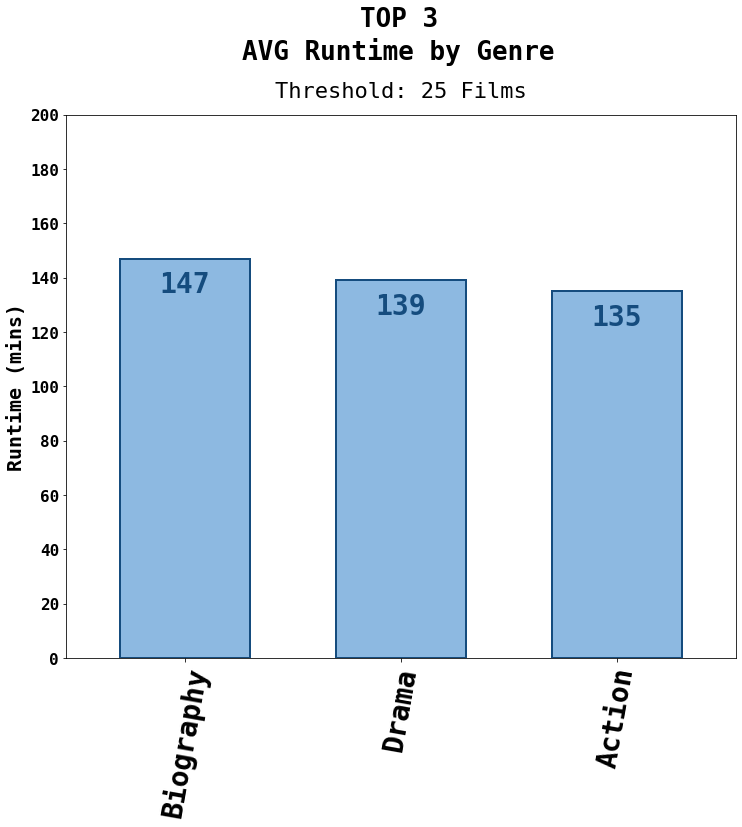

In [42]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Define plot size
plt.rcParams['figure.figsize'] = [12, 10]

#bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#bar chart
ax = gr.plot(x='Genre', y='Runtime', kind = 'bar', width = .6,
    color = '#8DB9E1',edgecolor = '#154C7E',linewidth = 2, legend = False, fontsize = 16)

#removing x label and adding y label
plt.xlabel('')
plt.ylabel('Runtime (mins)', weight = 'semibold', size = '20')

# Set the y labels
ax.set_ylim(0, 200)
ax.set_yticks([0,20,40,60,80,100,120,140,160,180,200], weight = 'bold', size = '20')

# Set the x labels
ax.set_xticklabels(gr['Genre'], weight = 'semibold', size = '28', rotation = 80)

#bar label
plt.bar_label(ax.containers[0], size = '28',color = '#154C7E', padding=-40)

#title
plt.suptitle("TOP 3\n" + "AVG Runtime by Genre", weight = 'bold', size = 26, x = .51, y=1.03)
plt.title("Threshold: 25 Films", weight = 'medium',size = 22, y = 1.02);

## Top 3 Runtimes by Director

In [43]:
all_df['Director'] = all_df['Director'].replace('Francis Ford Coppola','Francis F. Coppola')

dire = pd.DataFrame(all_df.groupby(['Director','Runtime'])['Director'].count()).rename(columns = {'Director':'Count'}).reset_index()
dire1= pd.DataFrame(dire.groupby(['Director'])['Count'].sum()).rename(columns = {'Director':'Count'}).reset_index().sort_values(by='Count', ascending = False)[:21]
# dire1

#merge
dire2 = dire1.merge(dire, how = 'inner', on = 'Director')
# dire2

#combined dataframe
d3 = pd.DataFrame(dire2.groupby(['Director'])['Runtime'].mean().astype(int)).reset_index().sort_values(by='Runtime', ascending=False)[:3]
d3

,Director,Runtime
15,Peter Jackson,186
18,Sergio Leone,176
8,Francis F. Coppola,174


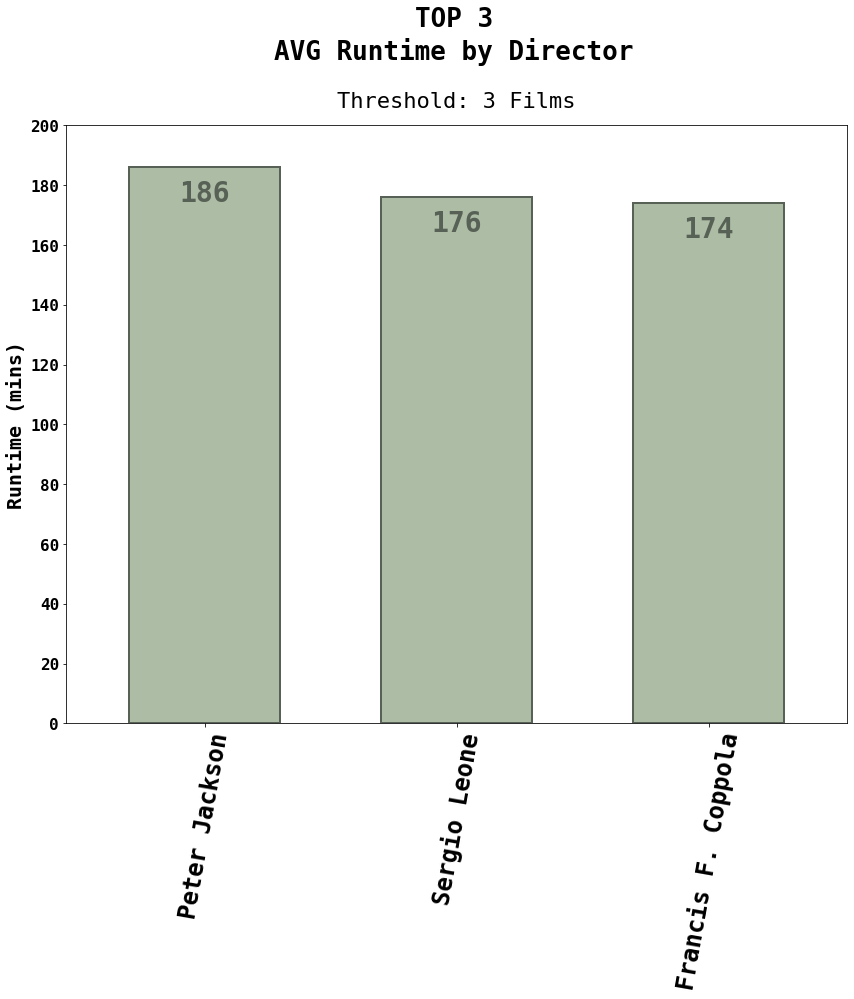

In [44]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Define plot size
plt.rcParams['figure.figsize'] = [14, 11]

#bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#bar chart
ax = d3.plot(x='Director', y='Runtime', kind = 'bar', width = .6,
    color = '#ADBDA5',edgecolor = '#586155',linewidth = 2, legend = False, fontsize = 16)

#removing x label and adding y label
plt.xlabel('')
plt.ylabel('Runtime (mins)', weight = 'semibold', size = '20')

# Set the y labels
ax.set_ylim(0, 200)
ax.set_yticks([0,20,40,60,80,100,120,140,160,180,200], weight = 'bold', size = '20')

# Set the x labels
ax.set_xticklabels(d3['Director'], weight = 'semibold', size = '24', rotation = 80)

#bar label
plt.bar_label(ax.containers[0], size = '28',color = '#586155', padding=-40)

#title
plt.suptitle("TOP 3\n" + "AVG Runtime by Director", weight = 'bold', size = 26, x = .51, y=1.03)
plt.title("Threshold: 3 Films", weight = 'medium',size = 22, y = 1.02);

## Ratio for award/noms of non-eng movie by language

In [45]:
aw_nom = not_eng[['Original_Language','Award_Wins','Award_Noms']]

aw_nom = aw_nom.merge(language, how='outer',
                      left_on='Original_Language',
                     right_on='Original Language')

aw_group = aw_nom.groupby(['Original_Language','Total Movies'])['Award_Wins'].sum()
nom_group = aw_nom.groupby(['Original_Language','Total Movies'])['Award_Noms'].sum()

In [46]:
nom_group_df = pd.DataFrame(nom_group).reset_index()
nom_group_df['Ratio'] = round(nom_group_df['Award_Noms']/nom_group_df['Total Movies'],0)
nom_group_df

,Original_Language,Total Movies,Award_Noms,Ratio
0,Arabic,2,64,32.0
1,Bangla,1,2,2.0
2,Belarusian,1,0,0.0
3,Danish,1,73,73.0
4,French,6,154,26.0
5,German,5,90,18.0
6,Hindi,3,76,25.0
7,Italian,5,94,19.0
8,Japanese,14,132,9.0
9,Korean,4,405,101.0


In [47]:
aw_group_df = pd.DataFrame(aw_group).reset_index()
aw_group_df['Ratio'] = round(aw_group_df['Award_Wins']/aw_group_df['Total Movies'],0)
aw_group_df

,Original_Language,Total Movies,Award_Wins,Ratio
0,Arabic,2,47,24.0
1,Bangla,1,11,11.0
2,Belarusian,1,3,3.0
3,Danish,1,38,38.0
4,French,6,161,27.0
5,German,5,123,25.0
6,Hindi,3,120,40.0
7,Italian,5,122,24.0
8,Japanese,14,180,13.0
9,Korean,4,451,113.0


In [48]:
print("Award Wins by Language")
print(aw_group.sort_values(ascending = False))
print(" ")
print(" ")
print(" ")
print("Award Nominations by Language")
print(nom_group.sort_values(ascending = False))

Award Wins by Language
Original_Language  Total Movies
Korean             4               451
Spanish            3               213
Japanese           14              180
French             6               161
German             5               123
Italian            5               122
Hindi              3               120
Persian            2               102
Portuguese         1                74
Arabic             2                47
Swedish            3                39
Danish             1                38
Turkish            1                14
Bangla             1                11
Russian            1                 8
Tamil              1                 6
Belarusian         1                 3
Name: Award_Wins, dtype: int64
 
 
 
Award Nominations by Language
Original_Language  Total Movies
Korean             4               405
Spanish            3               198
French             6               154
Japanese           14              132
Italian            5       

## English and Not English Pie Graphs

### Not English Genre Pie Graph

In [49]:
not_eng_g = not_eng.merge(genre, how='inner',on='Title_ID')

def cat_other(x):
    if x == 'Drama':
        return x
    elif x == 'Thriller':
        return x
    elif x == 'Mystery':
        return x
    else:
        return 'Other'

not_eng_g['Genre'] = not_eng_g['Genre'].map(cat_other)

#groupby
ne_group = pd.DataFrame(not_eng_g.groupby(['Genre'])['Original_Language'].count()
                        .sort_values()).reset_index()
ne_group

,Genre,Original_Language
0,Mystery,9
1,Thriller,10
2,Drama,46
3,Other,61


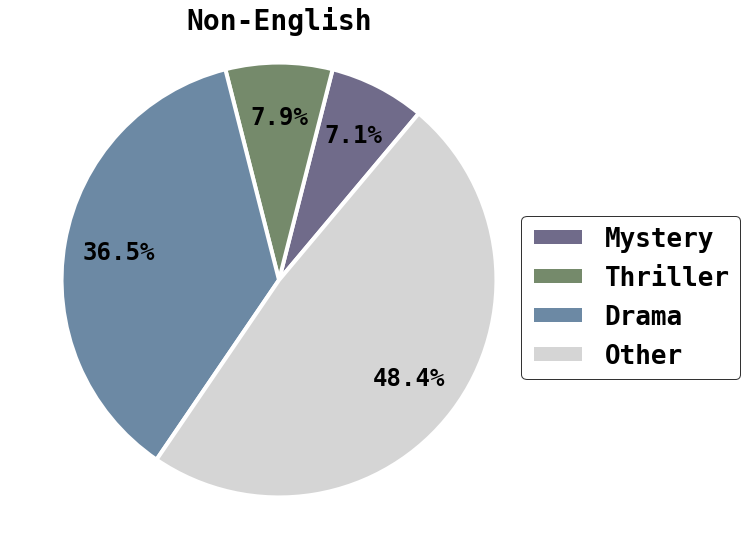

In [50]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Define plot size
plt.rcParams['figure.figsize'] = [14, 10]

#pie chart
ax = ne_group.plot(x='Genre', y='Original_Language', kind = 'pie', 
              colors = ['#706B8A','#758A6B','#6C89A4','#D5D5D5'], startangle=50, 
              labels = ['','','',''], textprops = {'color':'black'},
              wedgeprops = {"edgecolor" : "white",'linewidth': 4,'antialiased': True},
              autopct='%1.1f%%', pctdistance = .75, fontsize=24)

#legend
labels = ne_group['Genre']
plt.legend(labels, bbox_to_anchor=(.74,.61), edgecolor='black',
           fontsize=26, bbox_transform=plt.gcf().transFigure)

#removing y label
plt.ylabel('')

#title
plt.title("Non-English", weight = 'bold', size = 28, x = .5, y = .95);

### English Genre Pie Graph

In [51]:
all_g = all_df.merge(genre, how='inner',on='Title_ID')

def eng(x):
    if x == 'English':
        return x
    elif x == 'English (United Kingdom)':
        return 'English'
    else:
        return 'Other'

all_g['Original_Language'] = all_g['Original_Language'].map(eng)

#removing all 'others'
only_eng = all_g.loc[(all_g['Original_Language'] != 'Other')] 

#retrieving top 3 genres
def cat_other2(x):
    if x == 'Drama':
        return x
    elif x == 'Adventure':
        return x
    elif x == 'Action':
        return x
    else:
        return 'Other'

only_eng['Genre'] = only_eng['Genre'].map(cat_other2)
                     
#groupby
eng_group = pd.DataFrame(only_eng.groupby(['Genre'])['Original_Language'].count()
                        .sort_values()).reset_index()

eng_group

C:\Users\hanna\AppData\Local\Temp\ipykernel_3352\3107853481.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_eng['Genre'] = only_eng['Genre'].map(cat_other2)


,Genre,Original_Language
0,Action,44
1,Adventure,55
2,Drama,127
3,Other,264


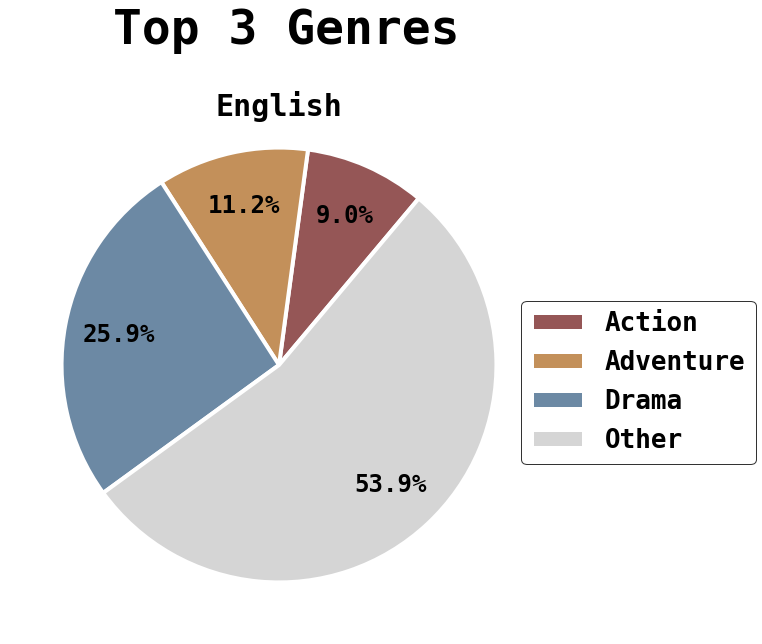

In [52]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Define plot size
plt.rcParams['figure.figsize'] = [14, 10]

#pie chart
ax = eng_group.plot(x='Genre', y='Original_Language', kind = 'pie', 
              colors = ['#955656','#C3905A','#6C89A4','#D5D5D5'], startangle=50, 
              labels = ['','','',''], textprops = {'color':'black'},
              wedgeprops = {"edgecolor" : "white",'linewidth': 4,'antialiased': True},
              autopct='%1.1f%%', pctdistance = .75, fontsize=24)

#legend
labels = eng_group['Genre']
plt.legend(labels, bbox_to_anchor=(.74,.61), edgecolor='black',
           fontsize=26, bbox_transform=plt.gcf().transFigure)

#removing y label
plt.ylabel('')

#title
plt.suptitle("Top 3 Genres", weight = 'bold', size = 48, x = .52, y = 1)

plt.title("English", weight = 'bold', size = 30,x =.5, y=0.947);

#### What percent of all the movies are English?

In [53]:
lang_count = pd.DataFrame(all_df['Original_Language'].value_counts())
lang_count.reset_index(inplace=True)
other = lang_count.rename(columns = {'index':'Original Language','Original_Language':'Total Movies'})
other

def other1(x):
    if x == 'English':
        return x
    elif x == 'English (United Kingdom)':
        return 'English'
    elif x == 'Not Available':
        return x
    else:
        return 'Non-English'

other['Original Language'] = other['Original Language'].map(other1)

#groupby
group = other.groupby(by='Original Language').sum()
df_group = pd.DataFrame(group.reset_index())
df_group['Percent'] = round((df_group['Total Movies']/df_group['Total Movies'].sum())*100,2)
sort = df_group.sort_values('Total Movies', ascending=False)
sort

,Original Language,Total Movies,Percent
0,English,193,77.2
1,Non-English,54,21.6
2,Not Available,3,1.2


### <font color='royalblue'> Visual (Question 3.b) </font>

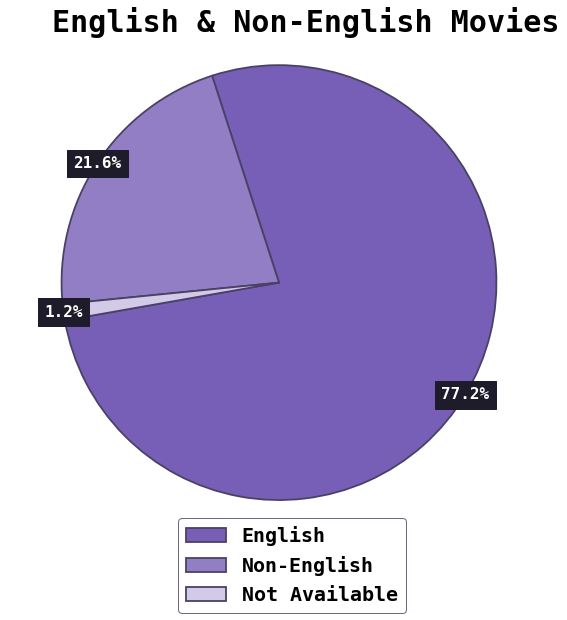

In [54]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

#bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Define plot size
plt.rcParams['figure.figsize'] = [14, 10]

#pie chart
sort.plot(x='Original Language', y='Total Movies', kind = 'pie', 
              colors = ['#775EB7','#927EC5','#D2CAE7'], startangle=190,
              labels = ('','',''), autopct='%1.1f%%', pctdistance = 1,
              textprops = {'backgroundcolor':'#1E1B2A', 'color':'white'}, 
              fontsize = 16,
              wedgeprops = {"edgecolor" : "#4B4165",'linewidth': 1.8,'antialiased': True})

#textprops documentation
#https://matplotlib.org/stable/tutorials/text/text_props.html

#legend
labels = sort['Original Language']
plt.legend(labels, bbox_to_anchor=(.648,.03),
           loc = 'lower right', edgecolor='#4B4165',
           fontsize=20, bbox_transform=plt.gcf().transFigure)

#removing y label
plt.ylabel('')

#title
plt.title("English & Non-English Movies", 
          weight = 'bold', size = 30, x = .55, y = .95);

In [55]:
rt_g = rt.merge(genre, how='inner',on='Title_ID')
rt_g_small = rt_g[['Title_ID','Original_Language','Genre']]
rt_g_small

,Title_ID,Original_Language,Genre
0,17761,English,Drama
1,17762,English,Crime
2,17762,English,Drama
3,17763,English,Action
4,17763,English,Crime
...,...,...,...
620,1776249,English,Action
621,1776249,English,Adventure
622,1776250,English,Biography
623,1776250,English,Drama


In [56]:
def cat(x):
    if x == 'English':
        return 'English'
    elif x == 'English (United Kingdom)':
        return 'English'
    elif x == 'Not Available':
        return x
    else:
        return 'Other'

rt_g_small['Lang_Clean'] = rt_g_small['Original_Language'].map(cat)
smaller = rt_g_small[['Lang_Clean','Genre']]

smaller_group = smaller.groupby(['Lang_Clean','Genre'])['Lang_Clean'].count()
smaller_group

#490

C:\Users\hanna\AppData\Local\Temp\ipykernel_3352\94943539.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_g_small['Lang_Clean'] = rt_g_small['Original_Language'].map(cat)


Lang_Clean     Genre    
English        Action        44
               Adventure     55
               Animation     17
               Biography     24
               Comedy        38
               Crime         43
               Drama        127
               Family         6
               Fantasy       11
               Film-Noir      4
               History        8
               Horror         5
               Music          4
               Musical        1
               Mystery       22
               Romance       17
               Sci-Fi        19
               Sport          4
               Thriller      20
               War           17
               Western        4
Not Available  Biography      1
               Comedy         2
               Drama          3
               Family         1
               History        1
               Romance        1
Other          Action         7
               Adventure      5
               Animation      6
               

In [129]:
all_df['Original_Language'].value_counts()

English          193
Japanese          14
French             6
Italian            5
German             5
Korean             4
Swedish            3
Not Available      3
Hindi              3
Spanish            3
Persian            2
Arabic             2
Belarusian         1
Danish             1
Portuguese         1
Bangla             1
Tamil              1
Turkish            1
Russian            1
Name: Original_Language, dtype: int64

In [145]:
#to make a threshold of 5
# all_lang = all_df.loc[(all_df['Original_Language'] == 'English') 
#                       & (all_df['Original_Language'] ==  'Japanese')
#                       & (all_df['Original_Language'] ==  'French') 
#                       & (all_df['Original_Language'] == 'Italian')
#                       & (all_df['Original_Language'] ==  'German')]
# all_lang

all_lang = pd.DataFrame(all_df['Original_Language'].value_counts()
                       ).reset_index().rename(columns = {'index':'Original_Language','Original_Language':'Count'})

all_lang = all_lang.loc[(all_lang['Count'] >= 5)]
all_lang

,Original_Language,Count
0,English,193
1,Japanese,14
2,French,6
3,Italian,5
4,German,5


In [146]:
#creating my sub table
all_lang2 = all_df.groupby('Original_Language')['RT_Audience_Score','IMDb_Score_Pct'].mean()
all_lang2.reset_index(inplace=True)

#rounding percents
all_lang2['Avg_RT_Pct'] = round(all_lang2['RT_Audience_Score'],1)
all_lang2['Avg_IMDb_Pct'] = round(all_lang2['IMDb_Score_Pct'],1)

#getting rid of the now unnecessary columns
all_lang2.pop('RT_Audience_Score')
all_lang2.pop('IMDb_Score_Pct')

#print
all_lang2

C:\Users\hanna\AppData\Local\Temp\ipykernel_3352\1873038360.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_lang2 = all_df.groupby('Original_Language')['RT_Audience_Score','IMDb_Score_Pct'].mean()


,Original_Language,Avg_RT_Pct,Avg_IMDb_Pct
0,Arabic,94.0,82.5
1,Bangla,93.0,83.0
2,Belarusian,95.0,84.0
3,Danish,93.0,83.0
4,English,91.5,83.1
5,French,94.0,82.5
6,German,94.6,83.2
7,Hindi,94.0,83.7
8,Italian,95.2,84.2
9,Japanese,95.1,83.5


In [147]:
#merge 
all_lang3 = all_lang.merge(all_lang2, how = 'inner',on='Original_Language')
all_lang3

,Original_Language,Count,Avg_RT_Pct,Avg_IMDb_Pct
0,English,193,91.5,83.1
1,Japanese,14,95.1,83.5
2,French,6,94.0,82.5
3,Italian,5,95.2,84.2
4,German,5,94.6,83.2


In [148]:
all_lang3['Diff'] = all_lang3['Avg_RT_Pct'] - all_lang3['Avg_IMDb_Pct'] 
all_lang3

,Original_Language,Count,Avg_RT_Pct,Avg_IMDb_Pct,Diff
0,English,193,91.5,83.1,8.4
1,Japanese,14,95.1,83.5,11.6
2,French,6,94.0,82.5,11.5
3,Italian,5,95.2,84.2,11.0
4,German,5,94.6,83.2,11.4


### <font color='royalblue'> Visual (Question 3.c) </font>

Text(0.5, 1.01, 'Threshold: 5 Films')

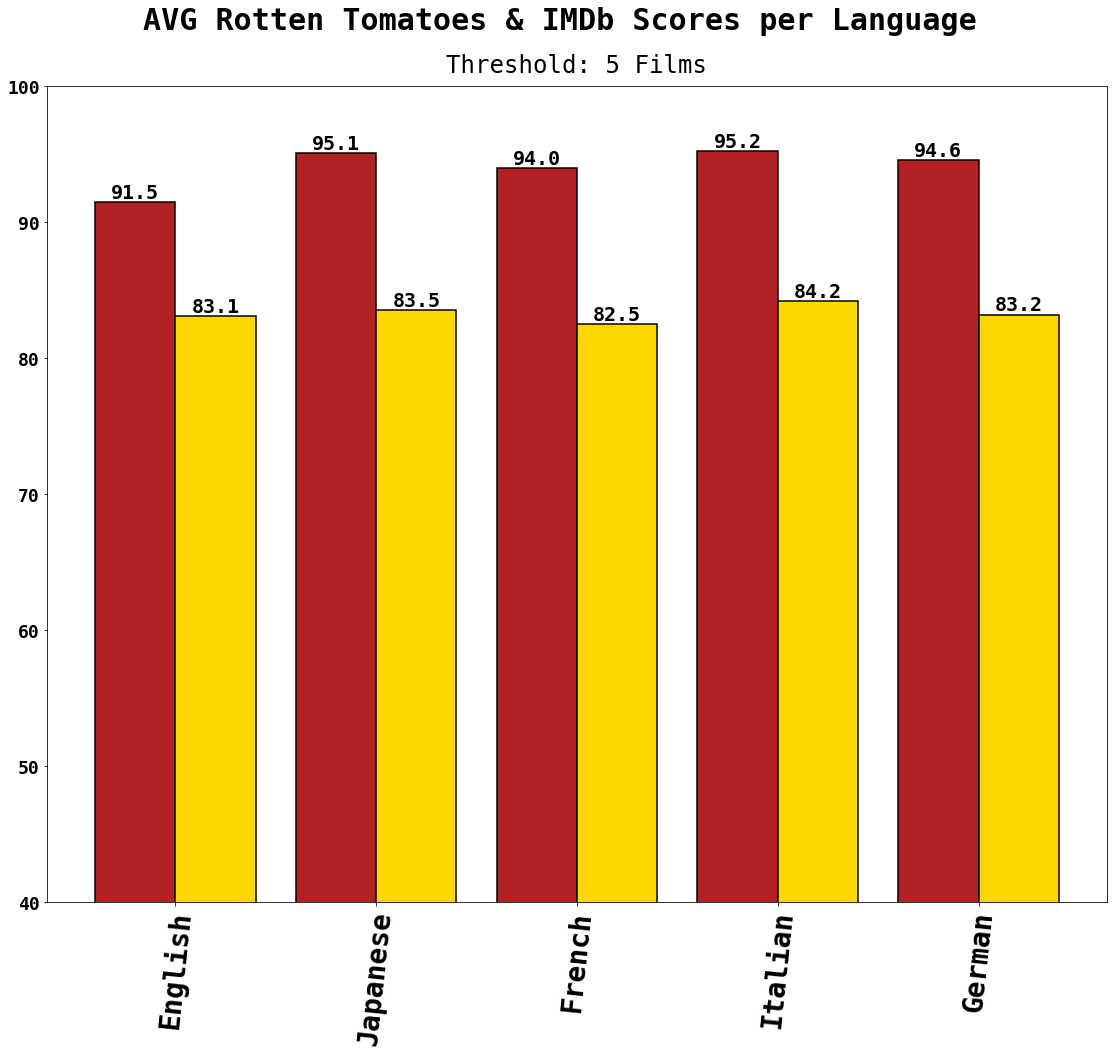

In [152]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Create the y value and bar width 
x = np.arange(len(all_lang3['Original_Language']))
width = 0.4

# Define plot size
plt.rcParams['figure.figsize'] = [19, 15]

# Plot the x and y values
fig,ax = plt.subplots()
bar1 = ax.bar(x-width/2, all_lang3['Avg_RT_Pct'], width, 
              color = 'firebrick', edgecolor = 'black', linewidth = 1.5)

bar2 = ax.bar(x+width/2, all_lang3['Avg_IMDb_Pct'], width, 
              color = 'gold', edgecolor = 'black', linewidth = 1.5)
 
# label values for bars
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html
for bar in ax.patches:
    bar_value = bar.get_height() # The text annotation for each bar should be its height.
    text = f'{bar_value:,}'   # Format the text with commas to separate thousands. 
    text_x = bar.get_x() + bar.get_width() / 2 # This will give the middle of each bar on the x-axis.
    # get_y() is where the bar starts so we add the height to it.
    text_y = bar.get_y() + bar_value
    # If we want the text to be the same color as the bar, we can get the color like so:
    bar_color = bar.get_facecolor()
    # If you want a consistent color, you can just set it as a constant, e.g. #222222
    ax.text(text_x, text_y, text, weight = 'semibold',
            ha='center', va='bottom', 
            color='black',size=20)
    
# Set the x labels and legends
ax.set_xticks(x)
ax.set_xticklabels(all_lang3['Original_Language'], 
                   weight = 'semibold', size = '28', rotation = 84)
ax.legend

# Set the y labels
ax.set_ylim(40,100)
ax.set_yticks([40,50,60,70,80,90,100])
ax.set_yticklabels(['40','50','60','70','80','90','100'], weight = 'bold', size = '18')

#title 
plt.suptitle("AVG Rotten Tomatoes & IMDb Scores per Language", 
             weight = 'bold', size = 30, x =.5, y=.954)
plt.title("Threshold: 5 Films", weight = 'medium', size = 24,x =.5, y=1.01)

#Clustered Bar legend
# plt.legend(["Rotten Tomatoes", "IMDb"], ncol=1, loc="upper left", 
#            bbox_to_anchor= (.76,1.005), fontsize = '19');

In [61]:
#subset
scat = not_eng[['Original_Language','US_Users','Non_US_Users']]
scat_sort = scat.sort_values(by='Non_US_Users', ascending = False)
scat_sort

,Original_Language,US_Users,Non_US_Users
44,French,78341,670168
33,Korean,168109,626228
22,Portuguese,134220,527568
100,French,126846,527163
30,Japanese,153556,516369
24,Italian,115303,490502
136,Spanish,150519,445833
69,Korean,103345,418640
57,German,57483,294701
84,Hindi,47396,285891


### <font color='royalblue'> Visual (Question 3) </font>

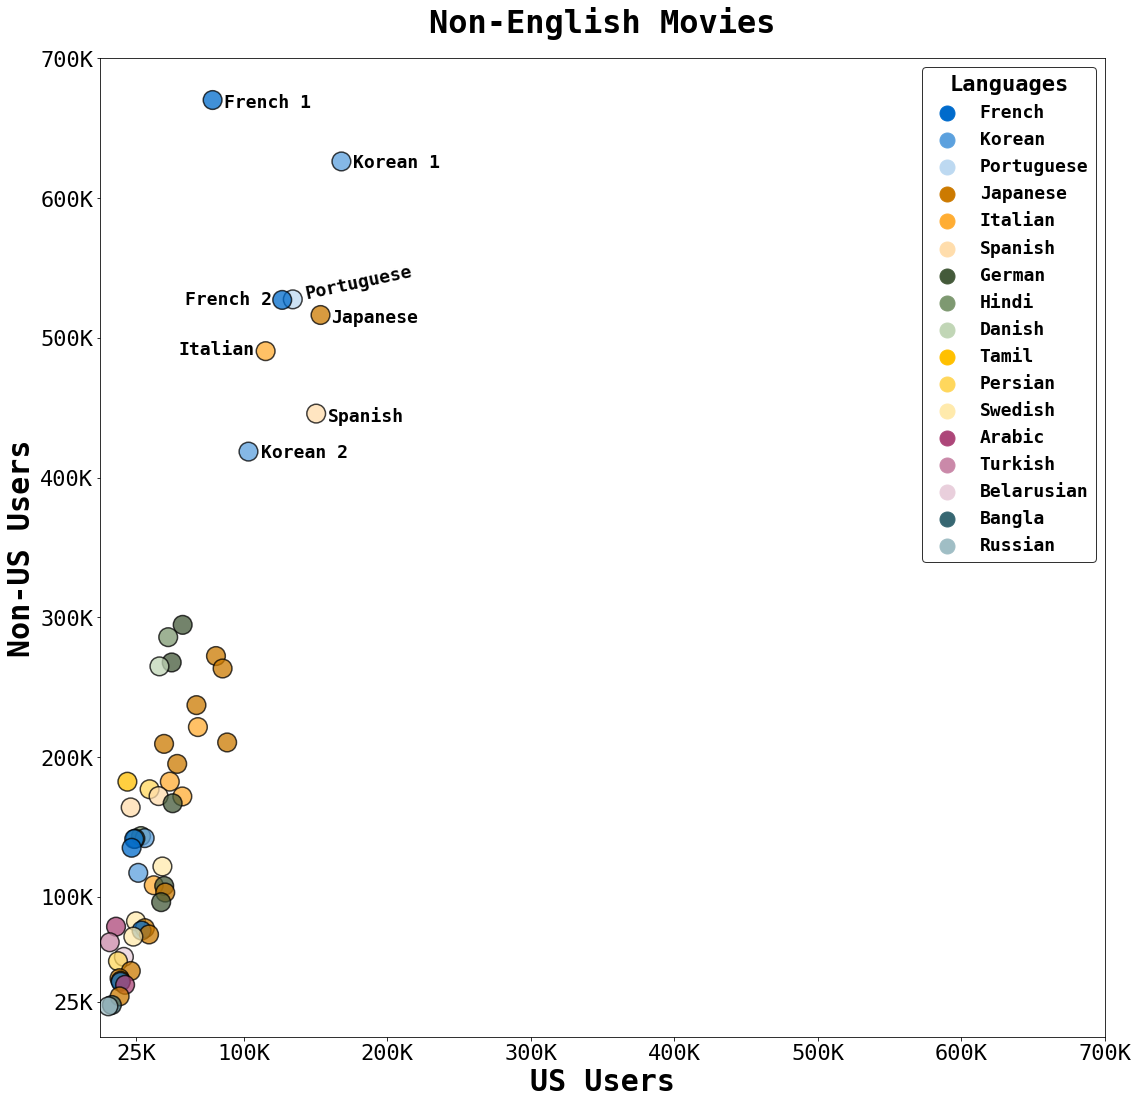

In [62]:
# Define plot size
plt.rcParams['figure.figsize'] = [18, 18]

pal_custom = ['#006BCC','#5CA1DE','#BDD9F1','#CC7A00','#FFAD33',
                  '#FFDDAC','#445A3A','#7E9971','#C1D6B6','#FFC000',
                  '#FFD75C','#FFEAAC','#AD4679','#CA89A9','#E9CFDC',
                 '#376772','#A0BEC5']

# scatterplot
fig, ax = plt.subplots()
ax = sns.scatterplot(x='US_Users', y = 'Non_US_Users', data = scat_sort, hue = 'Original_Language', 
                    palette = pal_custom, s=350, edgecolor = 'black', alpha = .75)

# x labels
plt.xlabel('US Users', size = '30')

ax.set_xlim(0, 700000)
ax.set_xticks([25000,100000,200000,300000,400000,500000,600000,700000])
ax.set_xticklabels(['25K','100K','200K','300K','400K','500K','600K','700K'], 
                   weight = 'medium',size = '22')

# y labels
plt.ylabel('Non-US Users', size = '30')

ax.set_ylim(0, 700000)
ax.set_yticks([25000,100000,200000,300000,400000,500000,600000,700000])
ax.set_yticklabels(['25K','100K','200K','300K','400K','500K','600K','700K'], 
                   weight = 'medium',size = '22')

# legend
plt.legend(title = 'Languages', title_fontsize = 22,
           fontsize=18, markerscale = 2.5, edgecolor = 'black')

# title
plt.title("Non-English Movies", weight = 'bold', size = 32,y=1.02)

#specific labels
plt.text(x=175900, y=621800, s='Korean 1', size = 18)
plt.text(x=112000, y=414500, s='Korean 2', size = 18)
plt.text(x=142000, y=527800, s='Portuguese', size = 18, rotation = 12)
plt.text(x=86200, y=665000, s='French 1', size = 18)
plt.text(x=159000, y=440000, s='Spanish', size = 18)
plt.text(x=59000, y=524000, s='French 2', size = 18)
plt.text(x=161000, y=511200, s='Japanese', size = 18)
plt.text(x=54500, y=487800, s='Italian', size = 18);

French 1: The Intouchables (2011) <br>
Korean: Parasite (2019) <br>
Japanese: Spirited Away (2001)<br>
Italian: Life Is Beautiful (1997)<br>
Spanish: Pan’s Labyrinth (2006)<br>
French 2: Seven Samurai (1954)<br>

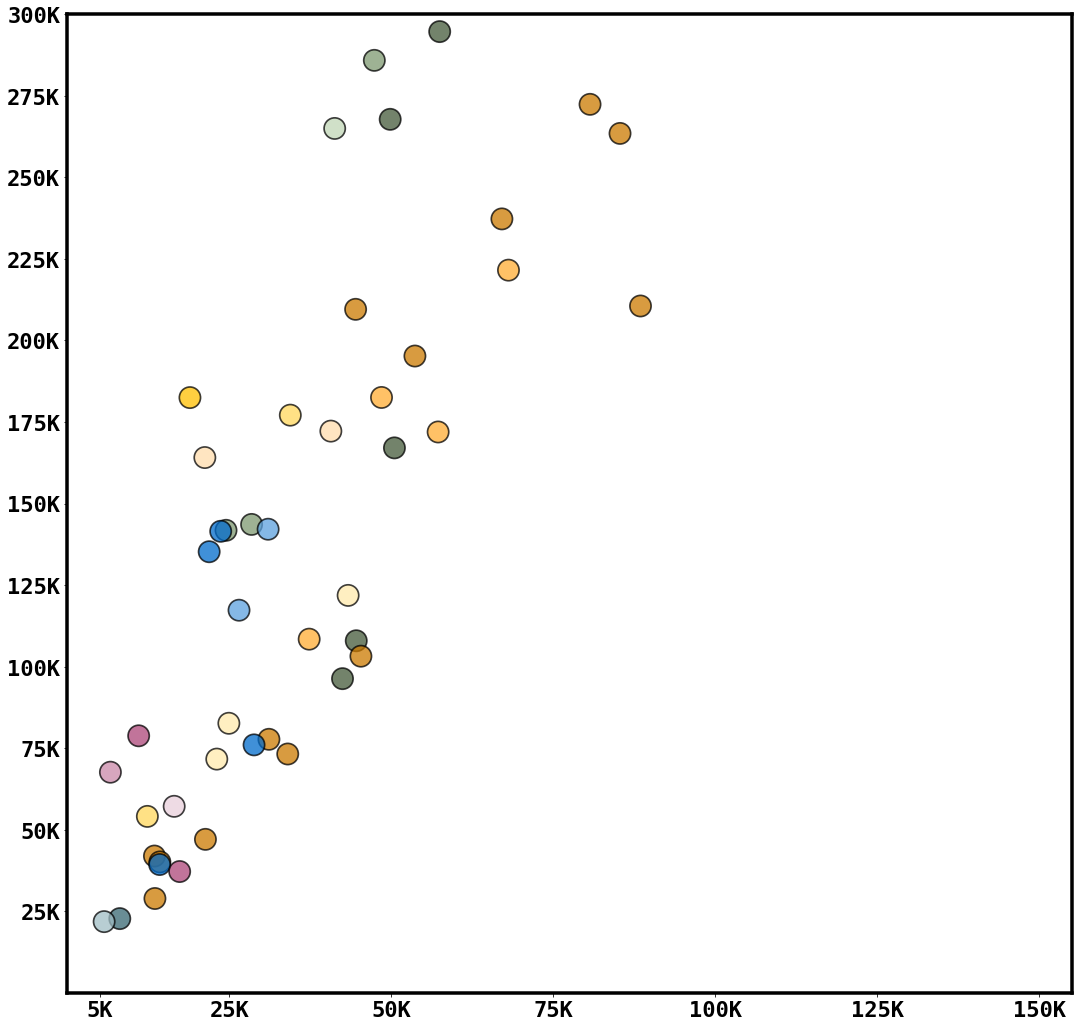

In [63]:
pal_custom = ['#006BCC','#5CA1DE','#BDD9F1','#CC7A00','#FFAD33',
                  '#FFDDAC','#445A3A','#7E9971','#C1D6B6','#FFC000',
                  '#FFD75C','#FFEAAC','#AD4679','#CA89A9','#E9CFDC',
                 '#376772','#A0BEC5']

# scatterplot
fig, ax = plt.subplots()
ax = sns.scatterplot(x='US_Users', y = 'Non_US_Users', data = scat_sort, 
                     hue = 'Original_Language', palette = pal_custom, 
                     s=450, edgecolor = 'black', alpha = .75, legend = False)

# x labels
plt.xlabel('')

ax.set_xlim(0, 155000)
ax.set_xticks([5000,25000,50000,75000,100000,125000,150000])
ax.set_xticklabels(['5K','25K','50K','75K','100K','125K','150K'], 
                   weight = 'bold',size = '22')

# y labels
plt.ylabel('')

ax.set_ylim(0, 300000)
ax.set_yticks([25000,50000,75000,100000,125000,150000,175000,
               200000,225000,250000,275000,300000])
ax.set_yticklabels(['25K','50K','75K','100K','125K','150K','175K',
                    '200K','225K','250K','275K','300K'], 
                   weight = 'bold',size = '22')

# border
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(3.5);

## English V Non-English Scatter

In [ ]:
eng_non = all_df[['Title','Release_Year','Original_Language','US_Users','Non_US_Users']]

In [ ]:
def eng_non(x):
    if x == 'English':
        return x
    elif x == 'English (United Kingdom)':
        return 'English'
    else:
        return 'Non-English'        


## Only English Scatter

In [153]:
all_df2 = all_df

def eng(x):
    if x == 'English':
        return x
    elif x == 'English (United Kingdom)':
        return 'English'
    else:
        return 'Non-English'

all_df2['Original_Language'] = all_df2['Original_Language'].map(eng)

#removing all 'others'
#only_eng2 = all_df2.loc[(all_df2['Original_Language'] != 'Other')] 

Text(0.5, 1.02, 'Out of Range')

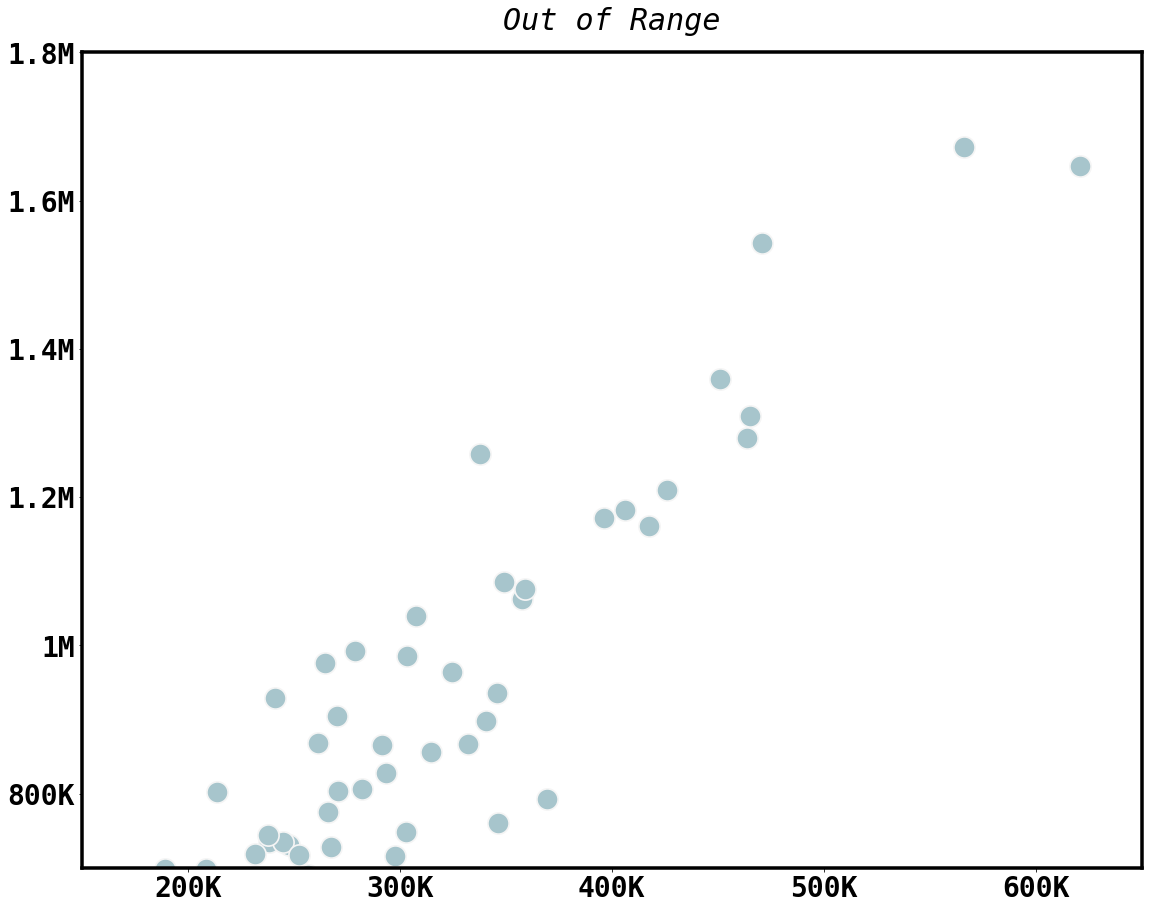

In [200]:
# scatterplot
fig, ax = plt.subplots()
ax = sns.scatterplot(x='US_Users', y = 'Non_US_Users', data = eng_non, 
                    color = '#A7C5CC', s=450, edgecolor = 'whitesmoke', alpha = 1)

# x labels
plt.xlabel('')
# plt.xlabel('US Users', size = '30')

ax.set_xlim(150000, 650000)
ax.set_xticks([200000,300000,400000,500000,600000])
ax.set_xticklabels(['200K','300K','400K','500K','600K'], 
                   weight = 'bold',size = '28')

# y labels
plt.ylabel('')
# plt.ylabel('Non-US Users', size = '30')

ax.set_ylim(700000, 1800000)
ax.set_yticks([800000,1000000,1200000,1400000,1600000,1800000])
ax.set_yticklabels(['800K','1M','1.2M','1.4M','1.6M','1.8M'],
                   weight = 'bold',size = '28')

# border
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(3.5)
    
#title 
plt.title("Out of Range", size = 30, style = 'italic', y = 1.02)

In [166]:
eng_non = all_df2[['Original_Language','US_Users','Non_US_Users']]
eng_non.sort_values(by='Original_Language')

,Original_Language,US_Users,Non_US_Users
0,English,566032,1672983
150,English,244851,734173
151,English,242038,634776
152,English,242704,663008
153,English,116065,266098
154,English,54384,158131
155,English,93102,196594
156,English,94831,217212
157,English,96524,174650
158,English,237760,743746


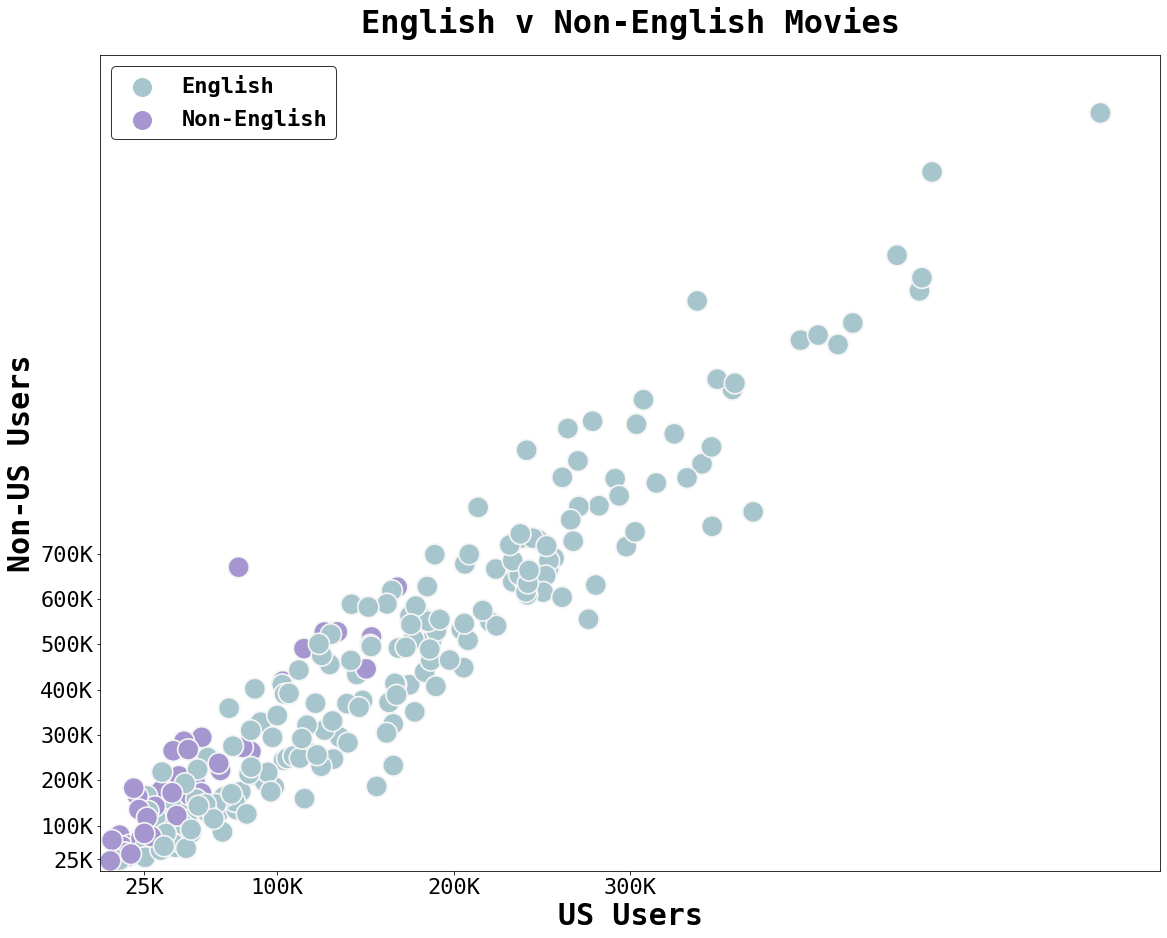

In [203]:
pal_custom = ['#A7C5CC','#A596CF']

# scatterplot
fig, ax = plt.subplots()
ax = sns.scatterplot(x='US_Users', y = 'Non_US_Users', alpha = 1,
                     hue = 'Original_Language', palette = pal_custom,
                     data = eng_non, s=450, edgecolor = 'whitesmoke')

# x labels
plt.xlabel('US Users', size = '30')

ax.set_xlim(0, 600000)
ax.set_xticks([25000,100000,200000,300000])
ax.set_xticklabels(['25K','100K','200K','300K'], 
                   weight = 'medium',size = '22')

# y labels
plt.ylabel('Non-US Users', size = '30')

ax.set_ylim(0, 1800000)
ax.set_yticks([25000,100000,200000,300000,400000,500000,600000,700000])
ax.set_yticklabels(['25K','100K','200K','300K','400K','500K','600K','700K'], 
                   weight = 'medium',size = '22')

# legend
plt.legend(fontsize=22, markerscale = 3, edgecolor = 'black')

# title
plt.title("English v Non-English Movies", weight = 'bold', size = 32, y=1.02);

In [67]:
t = only_eng2[['Title_ID','US_Users','Non_US_Users']]
t.sort_values(by = 'US_Users')

,Title_ID,US_Users,Non_US_Users
227,1776228,10974,23903
194,1776195,13444,32805
133,1776134,20647,47694
129,1776130,24724,128148
175,1776176,25123,72611
...,...,...,...
7,17768,463666,1280206
10,177611,465067,1309154
13,177614,470798,1542687
0,17761,566032,1672983


## Question 4: What is the most prevalent genre?

In [68]:
g = pd.DataFrame(genre['Genre'].value_counts())
g.reset_index(inplace=True)
g = g.rename(columns = {'index':'Genre','Genre':'Count'})
g['Percent'] = round((g.Count/genre['Genre'].value_counts().sum())*100,2)

def other(x):
    if x == 'Drama':
        return x
    elif x == 'Adventure':
        return x
    elif x == 'Action':
        return x
    elif x == 'Crime':
        return x
    elif x == 'Comedy':
        return x
    else:
        return 'Other'

g['Group_Genre'] = g['Genre'].map(other)
ggroup = pd.DataFrame(g.groupby(['Group_Genre'])['Count'].sum()).reset_index()
ggroup

,Group_Genre,Count
0,Action,51
1,Adventure,60
2,Comedy,46
3,Crime,51
4,Drama,176
5,Other,241


## Genre Pie Chart

In [69]:
def other(x):
    if x == 'Drama':
        return x
    elif x == 'Adventure':
        return x
    elif x == 'Action':
        return x
    elif x == 'Crime':
        return x
    elif x == 'Comedy':
        return x
    else:
        return 'Other'

g['Group_Genre'] = g['Genre'].map(other)
ggroup = pd.DataFrame(g.groupby(['Group_Genre'])['Count'].sum()).reset_index()
ggroup

,Group_Genre,Count
0,Action,51
1,Adventure,60
2,Comedy,46
3,Crime,51
4,Drama,176
5,Other,241


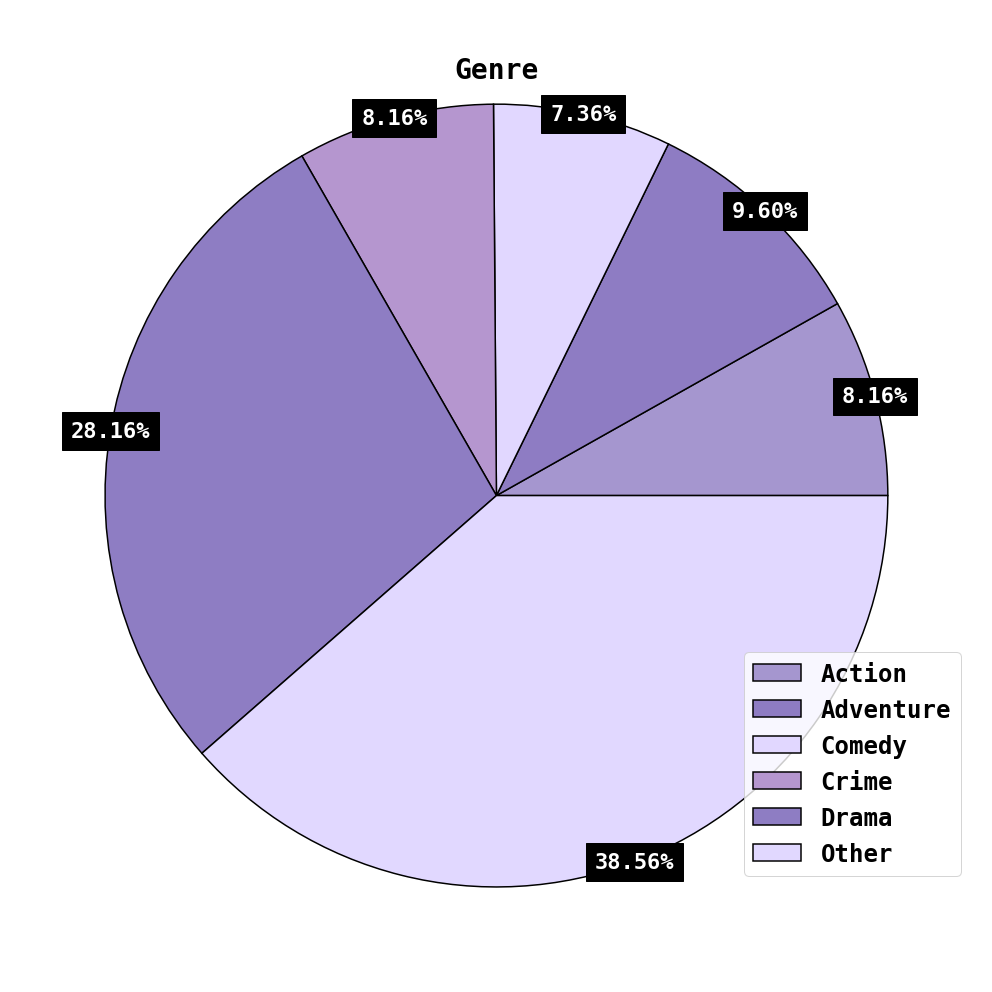

In [70]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

#bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#pie chart
ggroup.plot(x='Group_Genre', y='Count', kind = 'pie', 
            colors = ['#A596CF','#8E7CC3','#E1D7FF','#B596CF','#8E7DC3','#E1D8FF'],
            labels = ('','','','','',''), autopct='%1.2f%%', pctdistance = 1,
            textprops = {'backgroundcolor':'black', 'color':'white'}, fontsize = 22,
            wedgeprops = {"edgecolor" : "black",'linewidth': 1.5,'antialiased': True})

#legend
labels = ggroup['Group_Genre']
plt.legend(labels, bbox_to_anchor=(.88,.2),
           loc = 'lower right', fontsize=24, bbox_transform=plt.gcf().transFigure)

#removing y label
plt.ylabel('')

#title
plt.title("Genre", weight = 'bold', size = 28, x = .5, y = .92);

In [123]:
m_g['Genre'].count()

625

### Random Code for Later

code for visual font color

In [71]:
### <font color='royalblue'> Visual (Question 2) </font>

see all columns/rows

In [72]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
all_df

,Title_ID,Title,Director,Rating,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,Tomatometer,RT_Audience_Score,RT_Critic_Reviews,RT_Audience_Reviews,US_Box_Office,Original_Language,RT_All_Pct,US_Box_Int,IMDb_Score,Audience_Reviews,US_Users,Non_US_Users,Male_Reviews,Female_Reviews,Male_Score,Female_Score,IMDb_Score_Pct
0,17761,The Shawshank Redemption,Frank Darabont,R,142,1994,43,21,7041,91,98,82,250k+,27.3 M,English,94.5,2730000.0,9.3,2666904,566032,1672983,1475251,294889,9.3,9.2,93
1,17762,The Godfather,Francis F. Coppola,R,175,1972,30,32,7042,97,98,149,250k+,134.8 M,English,97.5,13480000.0,9.2,1848055,417566,1161734,1072921,166441,9.2,8.9,92
2,17763,The Dark Knight,Christopher Nolan,PG-13,152,2008,163,160,7043,94,94,345,250k+,2.0 M,English,94.0,200000.0,9.0,2639814,621027,1646769,1490958,267216,9.0,8.7,90
3,17764,The Godfather Part II,Francis F. Coppola,R,202,1974,21,17,7044,96,97,123,250k+,0,English,96.5,0.0,9.0,1265636,282291,805848,759883,105690,9.0,8.7,90
4,17765,12 Angry Men,Sidney Lumet,Approved,96,1957,13,17,7045,100,97,58,100k+,0,English,98.5,0.0,9.0,787589,187528,509017,453568,76860,9.0,8.9,90
5,17766,Schindler's List,Steven Spielberg,R,195,1993,49,91,7046,98,97,130,250k+,96.6 M,English,97.5,9660000.0,9.0,1350290,291447,865722,758414,171042,9.0,9.0,90
6,17767,The Lord of the Rings: The Return of the King,Peter Jackson,PG-13,201,2003,124,209,7047,93,86,274,250k+,377.8 M,English,89.5,37780000.0,9.0,1838370,396267,1171402,1041077,220902,9.0,8.9,90
7,17768,Pulp Fiction,Quentin Tarantino,R,154,1994,75,70,7048,92,96,113,250k+,0,English,94.0,0.0,8.9,2041472,463666,1280206,1155104,222242,8.9,8.5,89
8,17769,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,PG-13,178,2001,126,121,7049,91,95,234,250k+,315.5 M,English,93.0,31550000.0,8.8,1867531,406279,1182624,1038124,232568,8.8,8.8,88
9,177610,"The Good, the Bad and the Ugly",Sergio Leone,R,178,1966,6,3,70410,97,97,75,100k+,0,English,97.0,0.0,8.8,759951,168706,491783,495737,49542,8.9,8.4,88
